In [3]:
import sys
from time import time
import warnings
import pandas as pd
from data_structure.dataset import Dataset
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import auc
import seaborn as sns
from matplotlib import pyplot as plt
from utils.Utilities import *
warnings.filterwarnings('ignore')

In [4]:
import os
if os.path.isfile('data/ai4fit_data.csv'):
    ai4fit_data = pd.read_csv('data/ai4fit_data.csv')

In [5]:
def normalize(x):
    return(x-min(x))/(max(x)-min(x))

In [6]:
ai4fit_data['base_rank']= normalize(ai4fit_data.mean_rating-ai4fit_data.rating)

In [7]:
test_set = pd.DataFrame(columns=ai4fit_data.columns)
i = 0
for u_id in ai4fit_data.user_id.unique():
    row = ai4fit_data[ai4fit_data.user_id==u_id].sort_values(by=['w_id'],ascending=False).iloc[0]
    test_set.loc[i] = row
    i=i+1
print("In total: ", test_set.shape)
test_set.head(5).append(test_set.tail(5))

In total:  (291, 42)


,w_id,user_id,trainer_id,o_distance,o_time,o_pace,d_distance_sum,d_distance_std,d_distance_var,d_time_sum,...,mean_rating,rating,month,weekday,weeknumber,year,days_from_previous,user_pop,dec_user_pop,base_rank
0,142125,12931,4842,8000,3820,64.000000,0.437333,0.174933,3.060167e-02,1.329609,...,2.75,2,7,0,29,2018,0,4,2.75,0.875
1,142026,7108,2,6000,1980,165.000000,0.000000,0.000000,0.000000e+00,-0.016396,...,4.75,5,5,1,20,2018,4,1,0.00,0.375
2,145382,12508,4198,10000,0,0.000000,-0.000053,0.000026,7.021383e-10,0.000000,...,5.00,5,7,0,29,2018,0,13,11.75,0.500
3,156978,12752,2,5000,1700,170.000000,-0.000422,0.000211,4.450504e-08,0.055294,...,4.25,5,9,5,35,2018,24,30,28.75,0.125
4,165371,418,26,10000,4665,167.727273,0.000000,0.000000,0.000000e+00,0.856130,...,4.50,5,11,5,46,2018,14,159,157.75,0.250
286,161096,15330,9929,10000,0,0.000000,-0.000160,0.000080,6.428629e-09,0.000000,...,3.00,3,10,2,41,2018,6,5,3.75,0.500
287,165016,14603,9223,10000,0,0.000000,-0.000169,0.000084,7.124571e-09,0.000000,...,3.00,3,11,2,46,2018,7,5,3.75,0.500
288,165087,15924,9929,12000,0,0.000000,0.303466,0.151733,2.302298e-02,0.000000,...,3.00,3,11,2,46,2018,11,3,1.75,0.500
289,164905,15611,9223,9200,2920,295.000000,0.000000,0.000000,0.000000e+00,-0.244945,...,4.25,4,11,5,46,2018,7,4,2.75,0.625
290,164316,16004,9929,4800,1740,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,3.75,4,11,3,45,2018,0,0,0.00,0.375


In [8]:
training_set = ai4fit_data.loc[~ai4fit_data['w_id'].isin(test_set.w_id.values)]
print("In total: ", training_set.shape)
training_set.head(5).append(training_set.tail(5))

In total:  (5532, 42)


,w_id,user_id,trainer_id,o_distance,o_time,o_pace,d_distance_sum,d_distance_std,d_distance_var,d_time_sum,...,mean_rating,rating,month,weekday,weeknumber,year,days_from_previous,user_pop,dec_user_pop,base_rank
0,141355,12931,4842,2000,1200,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,5.00,5,5,4,19,2018,0,0,0.00,0.500
1,141357,7108,2,6000,0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,4.00,4,5,4,19,2018,0,0,0.00,0.500
2,141412,12508,4198,8400,1800,0.000000,-0.073392,0.003561,1.268350e-05,-0.093333,...,4.00,4,5,4,19,2018,0,0,0.00,0.500
3,141408,12752,2,5550,2025,336.428571,-0.095826,0.005754,3.310457e-05,0.124786,...,4.00,4,5,5,19,2018,0,0,0.00,0.500
4,141432,418,26,13000,5340,117.500000,0.000000,0.000000,0.000000e+00,1.059476,...,5.00,5,5,5,19,2018,0,0,0.00,0.500
5804,164449,3678,9223,4800,2664,37.058824,0.004113,0.003608,1.301646e-05,0.726587,...,3.00,3,11,4,45,2018,3,21,19.75,0.500
5805,164483,15611,9223,18000,5940,165.000000,0.000000,0.000000,0.000000e+00,-0.011873,...,5.00,5,11,5,45,2018,3,3,1.75,0.500
5806,164758,3678,9223,4500,2331,84.375000,-0.006348,0.001395,1.947032e-06,-0.837792,...,2.25,2,11,0,46,2018,3,22,20.75,0.625
5807,164851,13581,9223,5000,2100,210.000000,-0.001149,0.000575,3.302977e-07,0.063810,...,5.00,5,11,1,46,2018,24,13,11.75,0.500
5809,165099,1671,57,10000,575,143.750000,0.000000,0.000000,0.000000e+00,-0.185375,...,3.75,4,11,2,46,2018,18,40,38.75,0.375


In [9]:
columns = ['o_distance', 'p_unknown', 'p_walking', 'p_running', 'r_time',
               'r_speed', 'r_distance', 'r_pace', 'o_pace', 'o_time',
               'p_welldone', 'weight_situation', 'age', 'height', 'weight',
               'gender', 'bmi', 'calories', 'p_has_objective', 
           'd_distance_sum', 'd_distance_std', 'd_distance_var', 'd_time_sum',
       'd_time_std', 'd_time_var', 'd_pace_mean', 'd_pace_std', 'd_pace_var','mean_rating']
X_train = training_set[columns]
y_train = training_set[['rating']]

X_test = training_set[columns]
y_test = training_set[['rating']]

X_train, X_test, y_train, y_test = train_test_split(ai4fit_data[columns], ai4fit_data[['rating']], test_size=0.2, random_state=0)





In [10]:
columns = ['o_distance', 'p_unknown', 'p_walking', 'p_running', 'r_time',
                'r_distance', 'r_pace', 'o_pace', 'o_time',
               'p_welldone', 'weight_situation', 'age', 'height', 'weight',
               'gender', 'bmi', 'calories', 'p_has_objective', 
           'd_distance_sum', 'd_distance_std', 'd_distance_var', 'd_time_sum',
       'd_time_std', 'd_time_var', 'd_pace_mean', 'd_pace_std', 'd_pace_var','mean_rating']
importances = [5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 6.,
               8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 9., 10., 10., 10.,
               10., 10.,10., 10., 10.,
               10.
              ]



<AxesSubplot:>

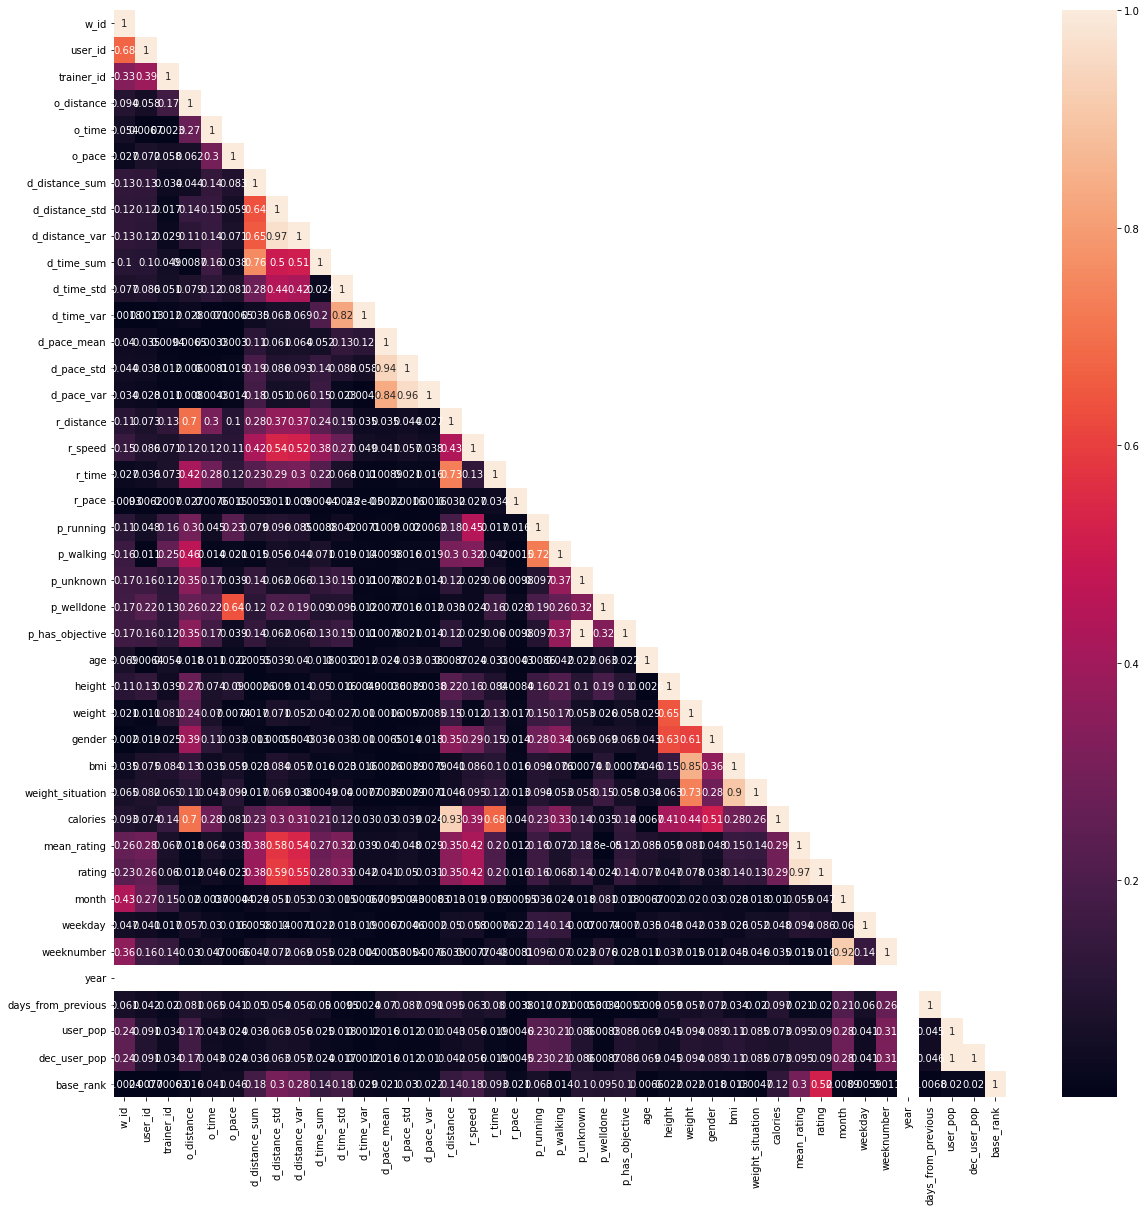

In [11]:
plt.figure(figsize=(20,20))
# Create correlation matrix
corr_matrix = training_set.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=0).astype(np.bool))


sns.heatmap(upper, annot=True)

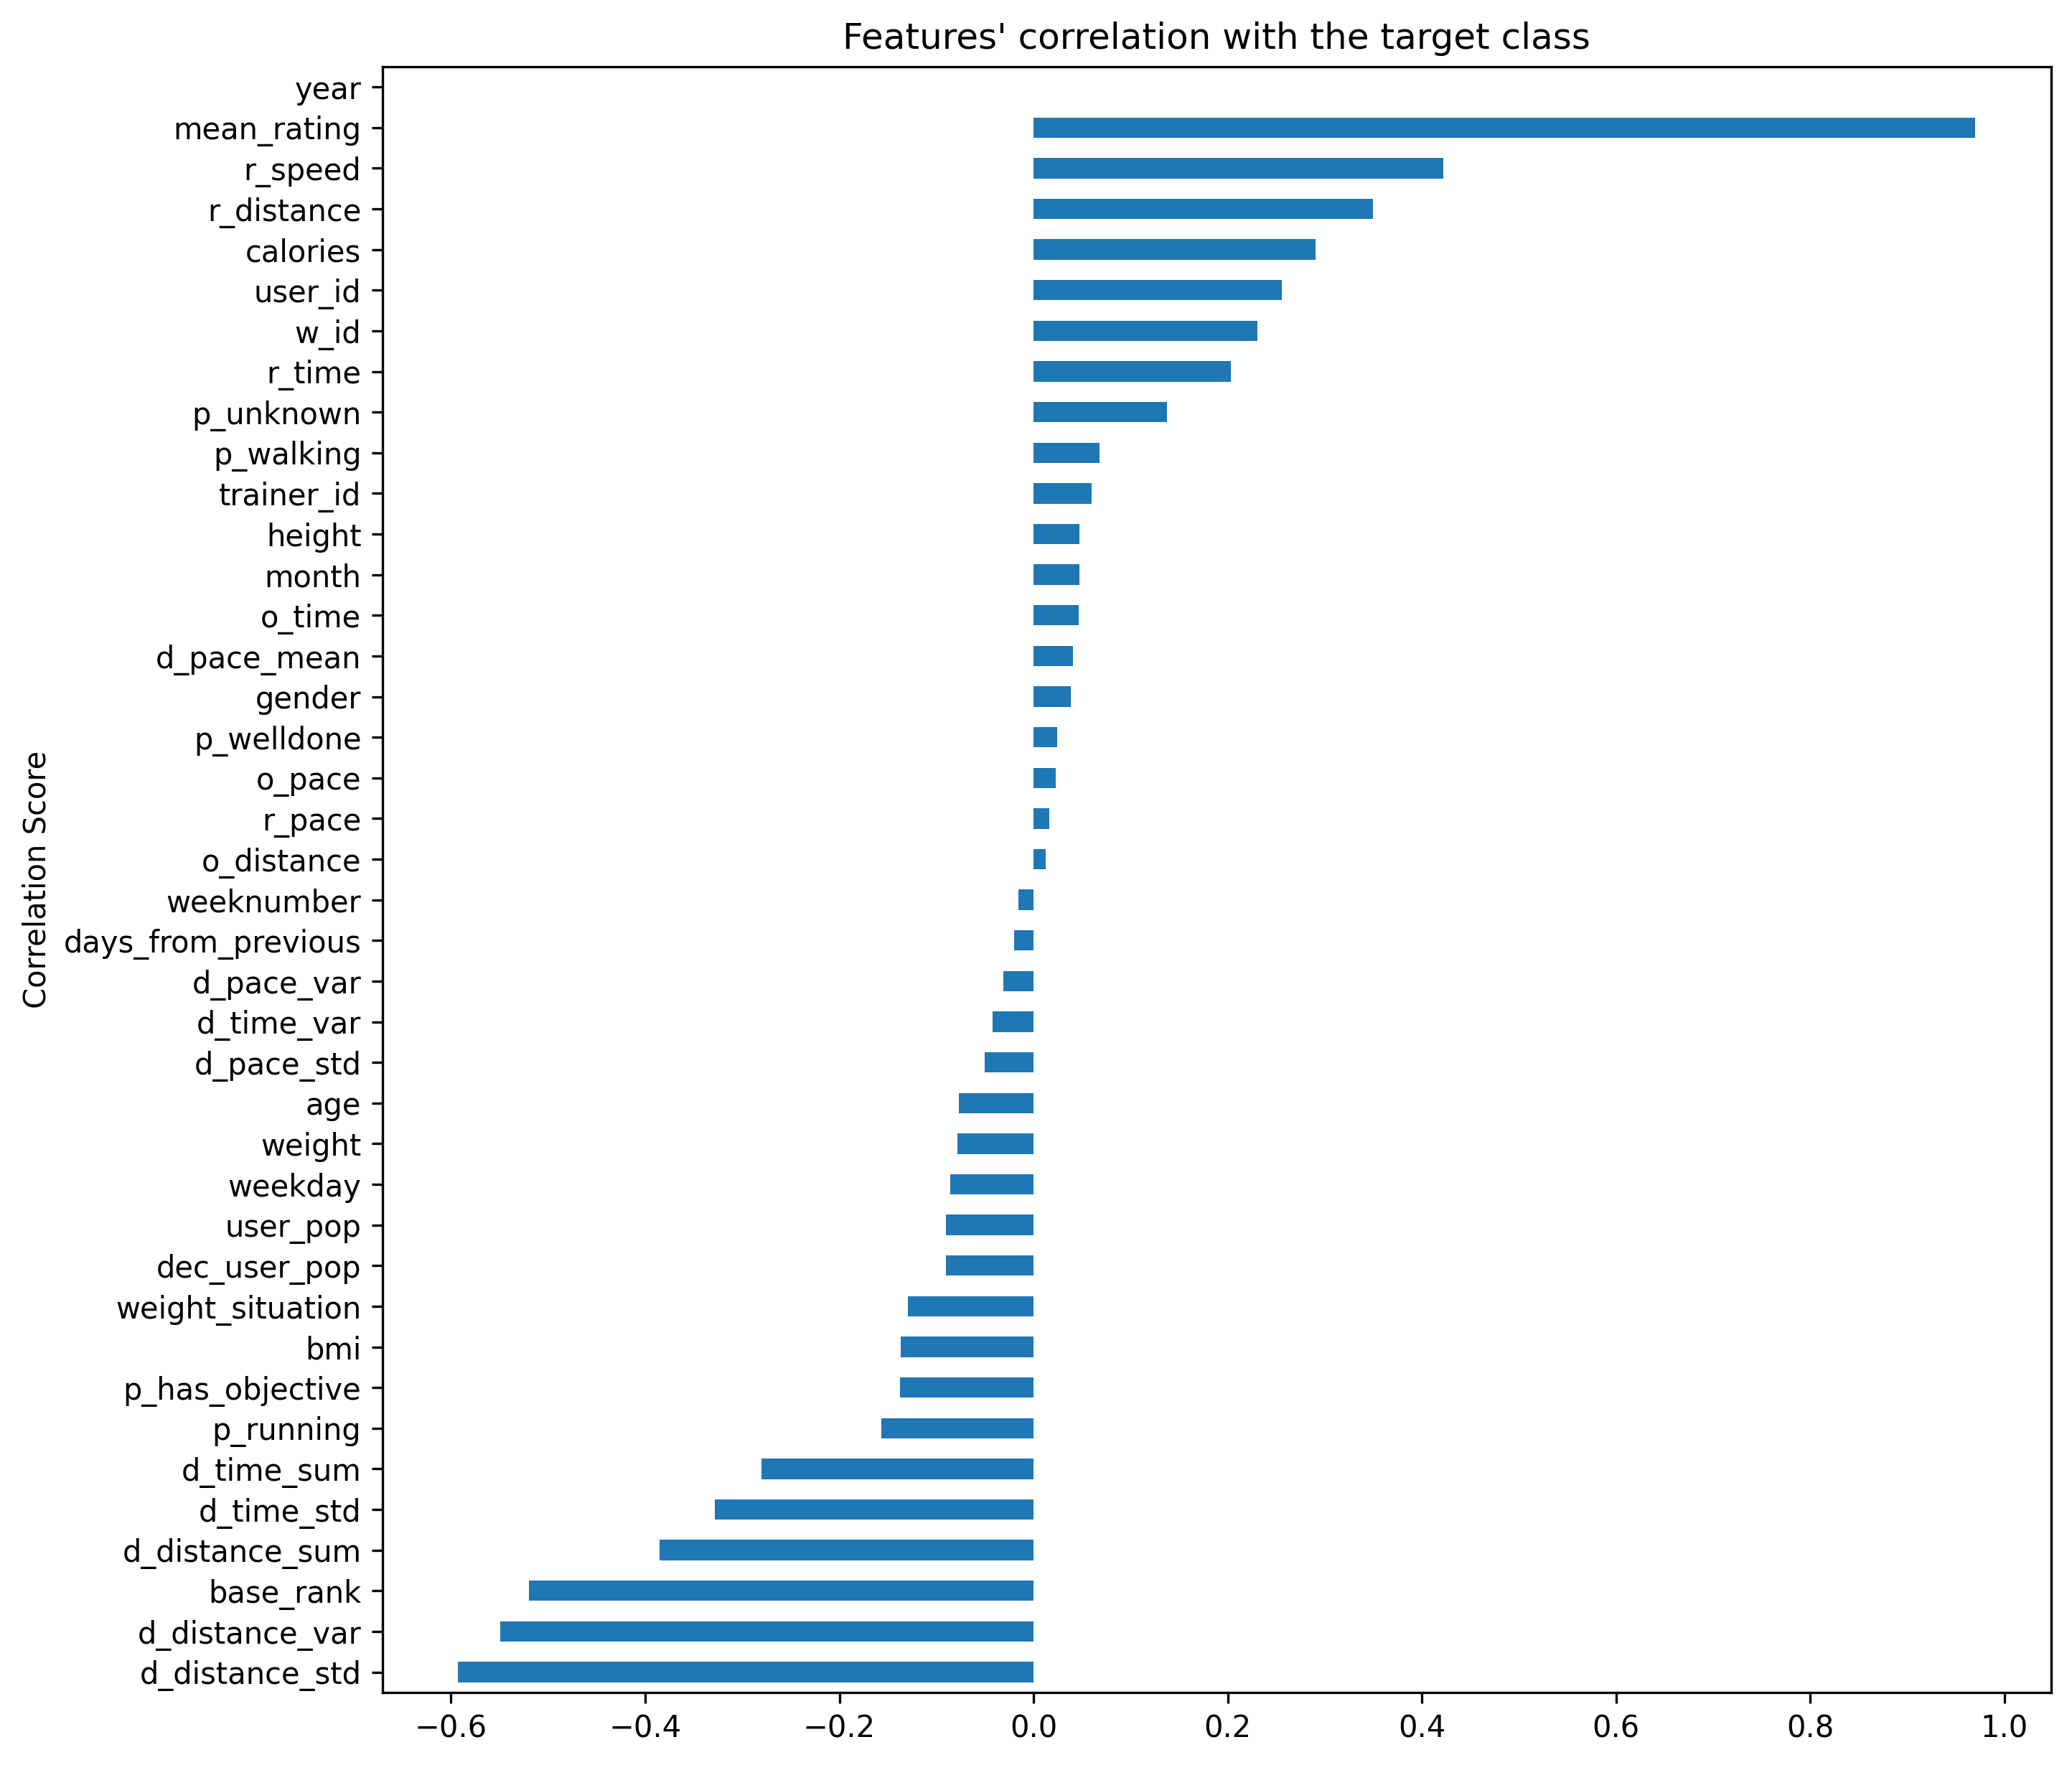

In [12]:
plt.figure(figsize=(10,10),dpi=300)
training_set[training_set.columns].corr().drop('rating')['rating'].sort_values().plot.barh()
plt.title('Features\' correlation with the target class')
plt.ylabel("Correlation Score")
plt.show()

In [13]:
columns_importances = {'column':columns,'importance':importances}
pd.DataFrame(columns_importances)

,column,importance
0,o_distance,5.0
1,p_unknown,5.0
2,p_walking,5.0
3,p_running,5.0
4,r_time,5.0
5,r_distance,5.0
6,r_pace,5.0
7,o_pace,5.0
8,o_time,5.0
9,p_welldone,5.0


In [14]:
from sklearn import tree
from sklearn import linear_model
import operator


In [15]:
time_start = datetime.now()



importances_ = importances.copy()#ensemble.GradientBoostingClassifier(),
classifiers = [ensemble.GradientBoostingClassifier(),ensemble.ExtraTreesClassifier(),ensemble.RandomForestClassifier(),tree.DecisionTreeClassifier()]
models = []
features = []

for classifier in classifiers:
    features_, models_ = remove_features_one_by_one(classifier, columns, X_train, y_train,)
    models = models + models_
    features = features + features_
    
results = print_results(models, features, X_test, y_test, 'data/results_removing_columns_'+str(datetime.now().strftime("%d-%m-%Y_%H:%M:%S"))+'.csv')
time_end = datetime.now()
diff = time_end - time_start
divmod(diff.days * 86400 + diff.seconds, 60)

 
GradientBoostingClassifier
 - Removing Features One By One and Training 
GradientBoostingClassifier - Elapsed time: 0:8:24.638 
ExtraTreesClassifier
 - Removing Features One By One and Training 
ExtraTreesClassifier - Elapsed time: 0:0:52.197 
RandomForestClassifier
 - Removing Features One By One and Training 
RandomForestClassifier - Elapsed time: 0:1:15.930 
DecisionTreeClassifier
 - Removing Features One By One and Training 
DecisionTreeClassifier - Elapsed time: 0:0:38.824
 - Printing Results
 - Results are stored in: data/results_removing_columns_09-05-2022_18:14:56.csv=====================================> 100%


(11, 15)

In [12]:
#results.columns = ['Algorithm', 'Accuracy', 'F1-Score', 'F2-Score', 'Recall', 'Precision', 'Informedness', 'RMSE', 'removed_item']

In [18]:
results.iloc[0]

0       Algorithm
1        Accuracy
2        F1-Score
3        F2-Score
4          Recall
5       Precision
6    Informedness
7            RMSE
8    removed_item
Name: 0, dtype: object

In [19]:
results.columns = results.iloc[0]
results = results.reindex(results.index.drop(0))


In [20]:
results.sort_values(by=['Informedness','Accuracy'],ascending=False).head(50)

,Algorithm,Accuracy,F1-Score,F2-Score,Recall,Precision,Informedness,RMSE,removed_item
78,RandomForestClassifier,0.95,0.948,0.95,0.951,0.945,0.937,0.238,"[r_speed, p_welldone]"
69,RandomForestClassifier,0.953,0.948,0.947,0.947,0.949,0.934,0.217,"[r_speed, d_distance_sum]"
21,GradientBoostingClassifier,0.949,0.947,0.947,0.946,0.949,0.933,0.225,"[r_speed, o_time]"
65,RandomForestClassifier,0.948,0.944,0.945,0.946,0.942,0.933,0.255,"[r_speed, d_time_std]"
86,RandomForestClassifier,0.948,0.944,0.945,0.945,0.944,0.931,0.229,"[p_unknown, r_speed]"
68,RandomForestClassifier,0.944,0.938,0.943,0.945,0.932,0.931,0.264,"[r_speed, d_distance_std]"
1,GradientBoostingClassifier,0.948,0.945,0.944,0.944,0.947,0.93,0.229,[r_speed]
4,GradientBoostingClassifier,0.948,0.946,0.945,0.944,0.948,0.93,0.229,"[r_speed, d_pace_std]"
5,GradientBoostingClassifier,0.948,0.946,0.945,0.944,0.949,0.93,0.229,"[r_speed, d_pace_mean]"
12,GradientBoostingClassifier,0.948,0.945,0.944,0.944,0.947,0.93,0.229,"[r_speed, p_has_objective]"


In [21]:
removed_items = []
for x in results.removed_item.values:
    if len(x)>0:
        removed_items.append(x[0])
    else:
        removed_items.append('None')

results.removed_item = removed_items
results.removed_item.unique()

array(['r_speed', 'r_time', 'p_running', 'p_walking', 'p_unknown',
       'o_distance'], dtype=object)

In [ ]:
GradientBoostingClassifier

In [22]:
results[results.removed_item=='None'].sort_values(by=['Informedness','Accuracy'],ascending=False)

,Algorithm,Accuracy,F1-Score,F2-Score,Recall,Precision,Informedness,RMSE,removed_item


In [23]:
results[results.Algorithm=='GradientBoostingClassifier'].sort_values(by=['Informedness','Accuracy'],ascending=False)

,Algorithm,Accuracy,F1-Score,F2-Score,Recall,Precision,Informedness,RMSE,removed_item
21,GradientBoostingClassifier,0.949,0.947,0.947,0.946,0.949,0.933,0.225,r_speed
1,GradientBoostingClassifier,0.948,0.945,0.944,0.944,0.947,0.93,0.229,r_speed
4,GradientBoostingClassifier,0.948,0.946,0.945,0.944,0.948,0.93,0.229,r_speed
5,GradientBoostingClassifier,0.948,0.946,0.945,0.944,0.949,0.93,0.229,r_speed
12,GradientBoostingClassifier,0.948,0.945,0.944,0.944,0.947,0.93,0.229,r_speed
28,GradientBoostingClassifier,0.948,0.945,0.944,0.944,0.947,0.93,0.229,p_unknown
3,GradientBoostingClassifier,0.947,0.947,0.945,0.944,0.949,0.93,0.231,r_speed
27,GradientBoostingClassifier,0.946,0.946,0.945,0.945,0.948,0.93,0.233,p_walking
16,GradientBoostingClassifier,0.947,0.946,0.945,0.944,0.949,0.929,0.231,r_speed
20,GradientBoostingClassifier,0.947,0.944,0.944,0.944,0.945,0.929,0.231,r_speed


In [24]:
start_time = time()
selected_atts = list(results.columns.values[1:-1])

results[selected_atts] = results[selected_atts].apply(pd.to_numeric)

results_dataset = Dataset(results[results.Algorithm=='GradientBoostingClassifier'])

results_dataset.compute_statistic(selected_atts)


,attribute,median,mean,min,max
0,Accuracy,0.945,0.933000,0.590,0.949
1,F1-Score,0.944,0.932000,0.600,0.947
2,F2-Score,0.943,0.931897,0.624,0.947
3,Recall,0.943,0.931759,0.636,0.946
4,Precision,0.946,0.933172,0.578,0.950
5,Informedness,0.928,0.913897,0.528,0.933
6,RMSE,0.234,0.253793,0.225,0.809


In [25]:
' - Elapsed time: ' + convertMillis(round((time() - start_time) * 1000)) 

' - Elapsed time: 0:0:2.582'

In [26]:
def getFirst(x):
    if(len(x)>0):
        return x[0]
    return 'all'

In [41]:
x = [x for x in results[results.Algorithm == 'DecisionTreeClassifier'].removed_item.values]

In [42]:
rf = results[results.Algorithm == 'DecisionTreeClassifier']

In [43]:
rf.removed_item = x

In [45]:
rf = rf.set_index('removed_item')

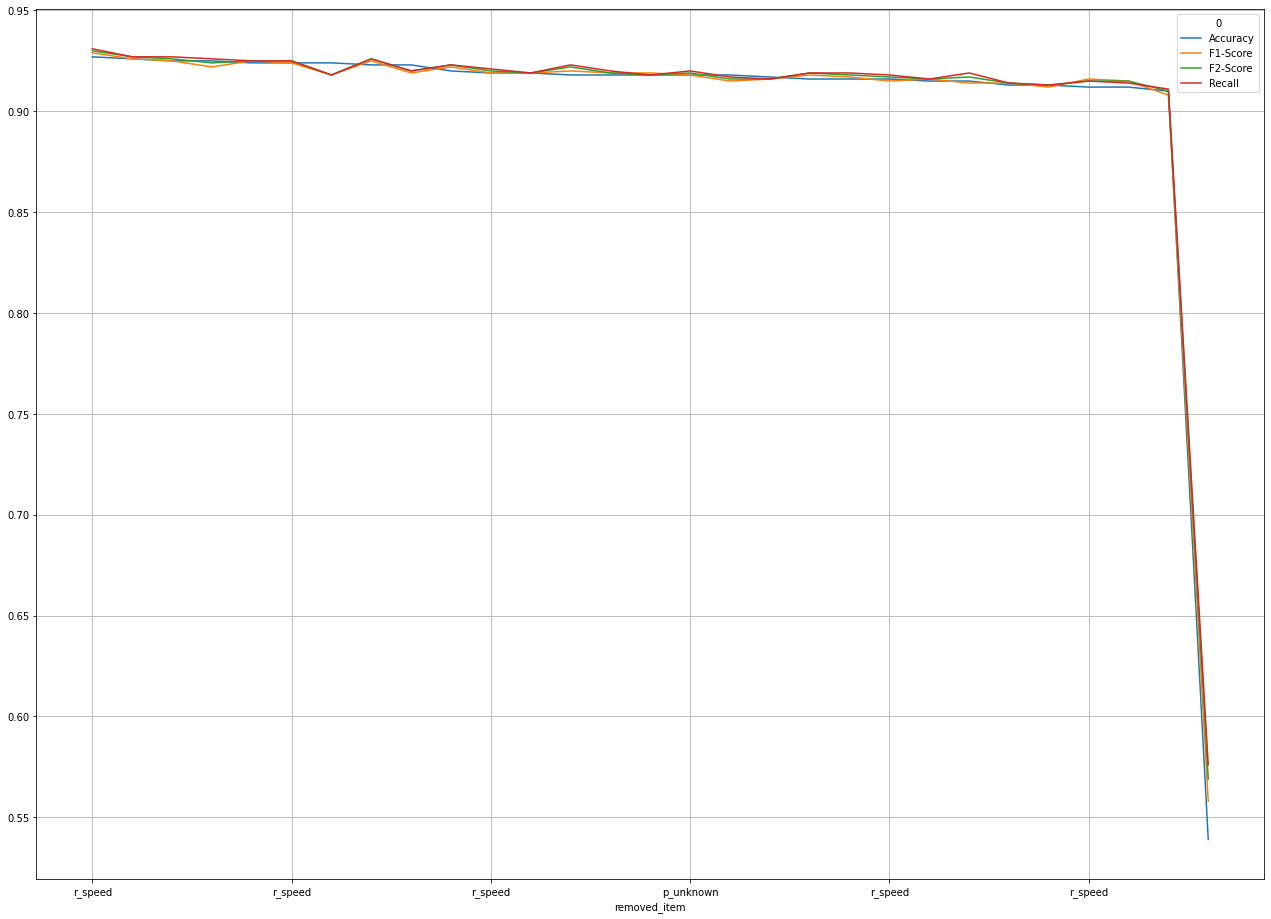

In [48]:

#plt.xticks(list(rf.index)) 
ax = rf[selected_atts[:-3]].sort_values(by=selected_atts[:-3],ascending=False).plot(figsize=(22,16),grid=True,x_compat=True)
#ax.set_xticks(np.arange(rf.shape[0]))
#ax.set_xticklabels(list(rf.index))
plt.show()

In [35]:
np.arange(rf.shape[0])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [49]:
rf[selected_atts].sort_values(by='Accuracy', ascending=False)

,Accuracy,F1-Score,F2-Score,Recall,Precision,Informedness,RMSE
removed_item,,,,,,,
r_speed,0.927,0.929,0.930,0.931,0.928,0.911,0.270
r_speed,0.926,0.926,0.927,0.927,0.926,0.907,0.272
r_time,0.925,0.922,0.924,0.926,0.919,0.906,0.273
r_speed,0.925,0.925,0.926,0.927,0.923,0.907,0.273
r_speed,0.924,0.924,0.925,0.925,0.923,0.905,0.275
r_speed,0.924,0.925,0.925,0.925,0.926,0.904,0.275
r_speed,0.924,0.918,0.918,0.918,0.918,0.898,0.275
r_speed,0.923,0.925,0.926,0.926,0.924,0.906,0.278
r_speed,0.923,0.919,0.920,0.920,0.918,0.900,0.278


In [50]:
def linear_correlation(_data, _y_col="Score", top_threshold=0.5, round_default=2):
    """
    Compute the correlation between attributes and generated scores using linear regression.

    Attributes:
        _data: dataframe that stored the data
        _y_col: column name of Y variable
        top_threshold: threshold of attribute coefficient
        round_default: threshold of round function for the returned coefficient
    Return:  list of correlated attributes and its coefficients
    """
    num_atts = list(_data.iloc[:,:-2].describe().columns)
    X = _data[num_atts].values
    y = _data[_y_col].values

    regr = linear_model.LinearRegression(normalize=False)
    regr.fit(X, y)
    for i in range(len(regr.coef_)):
        regr.coef_[i] = round(regr.coef_[i], round_default)
    # normalize coefficients to [-1,1]
    max_coef = max(regr.coef_)
    min_coef = min(regr.coef_)
    abs_max = max(abs(max_coef),abs(min_coef))
    norm_coef = []
    for ci in regr.coef_:
        new_ci = round(ci/abs_max,round_default)
        norm_coef.append(new_ci)
    coeff_zip = zip(norm_coef, num_atts)
    return_coeff = {}
    for ci, atti in coeff_zip:
        if ci > top_threshold:
            return_coeff[atti] = ci
    return return_coeff

In [51]:
linear_correlation(ai4fit_data, _y_col="rating",top_threshold=0.3)

{'rating': 1.0}

In [52]:
sorted_results = results.sort_values(by=['Informedness','Accuracy'],ascending=False)

In [53]:
algo = sorted_results.iloc[:1]["Algorithm"]
removed_item = sorted_results.iloc[:1]["removed_item"]

In [54]:
algo.values[0]

'RandomForestClassifier'

In [55]:
if hasattr(removed_item.values[0],'size'):
    item = removed_item.values[0][0]

In [56]:
fc = list(X_train.columns.values) #['gender', 'o_pace', 'p_unknown', 'd_distance', 'o_distance', 'd_pace_std', 'r_time', 'd_pace_mean', 'weight_situation', 'r_pace', 'calories','r_speed','p_has_objective']

In [57]:
model = ensemble.GradientBoostingClassifier()

In [58]:
if hasattr(removed_item.values[0],'size'):
    fc.remove(removed_item.values[0][0])

In [59]:
#X_train, X_test, y_train, y_test = train_test_split(X[fc], y, test_size=0.2, random_state=0)
model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [60]:
trained_model = model#train_model_with_features(model,fc,X_train, y_train)

In [61]:
from sklearn.metrics import accuracy_score, roc_curve
y_pred = trained_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.9476394849785408

In [62]:
mm.MulticlassMetrics(X_test=X_test[fc],y_test=y_test,estimator=trained_model).to_string()


Accuracy       0.9790557939914164
F1-Score       0.9474256686730083
F2-Score       0.9475382797193088
Recall         0.9474563425136333
Precision      0.9478661703116862
Informedness   0.93336762678884
RMSE           0.24336694067017156


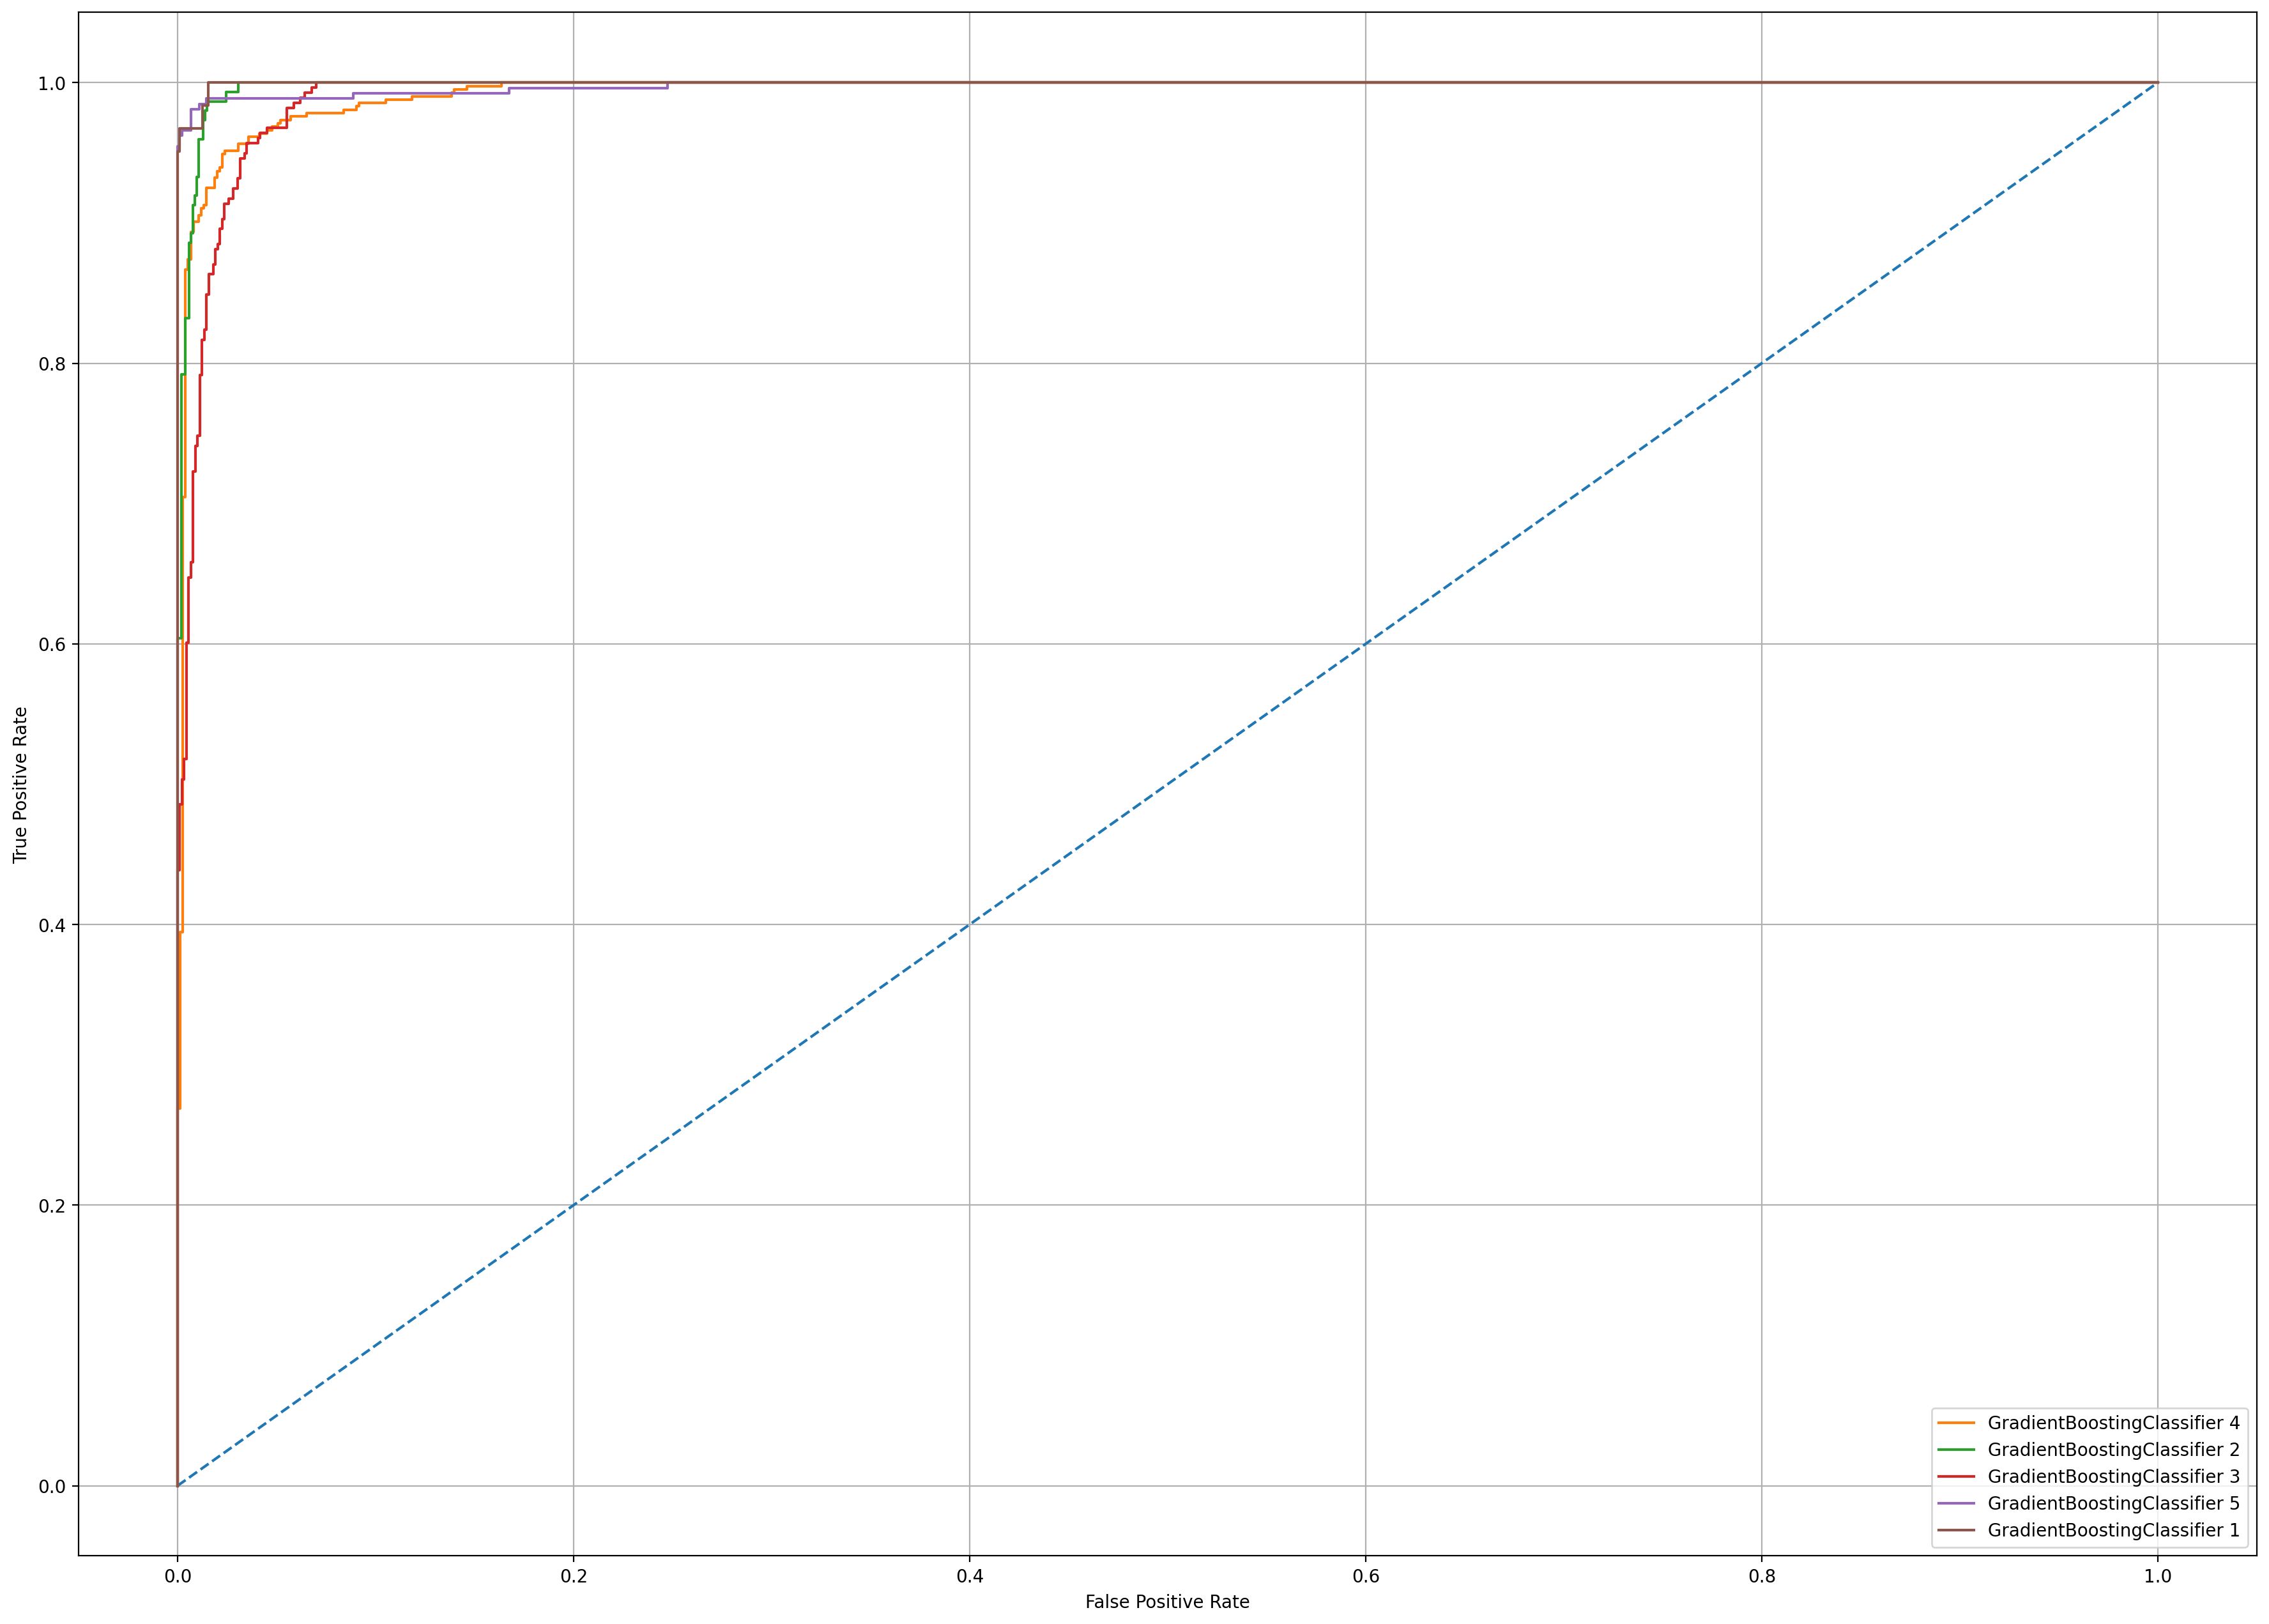

In [63]:
# plot no skill
plt.figure(figsize=(22,16), dpi=200)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
for l in y_test.rating.unique():
    # keep probabilities for the positive outcome only
    probs_dt = trained_model.predict_proba(X_test[fc])[:, l-1]
    # calculate roc curve
    fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, probs_dt,pos_label=l)
    plt.plot(fpr_dt, tpr_dt,label=trained_model.__class__.__name__+' '+str(l))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid()
# show the plot
plt.show()

In [64]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score

In [65]:
clf = ensemble.GradientBoostingClassifier()
smt = SMOTETomek(random_state=0)
X_train = X_train[fc]
y_train = y_train['rating'].values.ravel()
X_smt, y_smt = smt.fit_sample(X_train, y_train)
cv_results = cross_validate(clf, X_smt, y_smt, cv=10,scoring='accuracy',return_estimator=True)
pd.DataFrame(cv_results)

,fit_time,score_time,estimator,test_score
0,15.650810,0.006267,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.939437
1,15.218147,0.005372,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.938028
2,14.667749,0.005228,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.949296
3,14.103190,0.005420,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.947887
4,14.633777,0.004271,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.969014
5,13.810554,0.005427,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.957746
6,14.514875,0.004213,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.976056
7,15.011526,0.004751,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.981690
8,13.961755,0.004022,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.983099
9,13.856623,0.004066,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.988717


In [66]:
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results['test_score'].mean(), cv_results['test_score'] .std() * 2))

Accuracy: 0.96 (+/- 0.04)


In [67]:
print('Accuracy      ',accuracy_score(cv_results['estimator'][3].predict(X_train),y_train))

mm.MulticlassMetrics(X_test=X_train[fc],y_test=y_train,estimator=cv_results['estimator'][3]).to_string()


Accuracy       0.9690854443967368
Accuracy       0.9876341777586948
F1-Score       0.9727032631653023
F2-Score       0.9730620293455564
Recall         0.9732395363965984
Precision      0.9723526481718775
Informedness   0.9648555667755805
RMSE           0.17582535540491082


In [68]:
print('Accuracy      ',accuracy_score(cv_results['estimator'][3].predict(X_test),y_test))

mm.MulticlassMetrics(X_test=X_test[fc],y_test=y_test,estimator=cv_results['estimator'][3]).to_string()


Accuracy       0.9459227467811159
Accuracy       0.9783690987124464
F1-Score       0.9444097247277272
F2-Score       0.9437111883165156
Recall         0.9430705350690696
Precision      0.9462825292834671
Informedness   0.928534364618411
RMSE           0.2325451638260493


In [69]:
trained_model = cv_results['estimator'][3]

In [41]:
from sklearn.metrics import *
from sklearn import ensemble, tree
from sklearn.model_selection import GridSearchCV

In [42]:
from sklearn.metrics import *
from sklearn import ensemble, tree
from sklearn.model_selection import GridSearchCV
scoring = {'accuracy': make_scorer(accuracy_score),
           #'precision': make_scorer(precision_score)
          }

parameters = {'max_depth':range(8,15),'n_estimators':[400,500]}
gs = GridSearchCV(ensemble.GradientBoostingClassifier(), parameters, n_jobs=-1, cv=10, scoring=scoring, refit='accuracy')
gs.fit(X=X_smt[best_features], y=y_smt)

In [167]:
gs.fit(X=X_smt[best_features], y=y_smt)

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
        

In [168]:
gs.best_params_

{'max_depth': 9, 'n_estimators': 500}

In [169]:
gs.best_score_

0.8947577587302368

In [170]:
trained_model = gs.best_estimator_

In [174]:
print('Accuracy      ',accuracy_score(y_test, gs.best_estimator_.predict(X_test[best_features])))

mm.MulticlassMetrics(X_test=X_test[best_features],y_test=y_test,estimator=gs.best_estimator_).to_string()

Accuracy       0.8303495311167945
Accuracy       0.9321398124467178
F1-Score       0.817510778292319
F2-Score       0.8205361768269417
Recall         0.8223523999137182
Precision      0.813350807082166
Informedness   0.7778562792012818
RMSE           0.5132515075227978


In [54]:
def get_prediction_values(cmx):
    """Gets a sklearn confusion matrix and returns the prediction values
    (FP,FN,TP,TN).

    Arguments:
    cmx {numpy.ndarray} -- [a sklearn confusion matrix]
    """

    FP = cmx.sum(axis=0) - np.diag(cmx)
    FN = cmx.sum(axis=1) - np.diag(cmx)
    TP = np.diag(cmx)
    TN = cmx.sum() - (FP + FN + TP)

    FP = FP[~np.isnan(FP)]
    FN = FN[~np.isnan(FN)]
    TP = TP[~np.isnan(TP)]
    TN = TN[~np.isnan(TN)]
    return (FP, FN, TP, TN)


In [55]:
def informedness_score(y_true, y_pred):
    """
    Requires "get_prediction_values"
    """
    cmx = confusion_matrix(y_true, y_pred)
    FP, FN, TP, TN = get_prediction_values(cmx)
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP)
    INF = TPR + TNR - 1
    return INF.mean()

In [83]:
def eval_metrics(actual, pred, average='binary'):
    accuracy =     round(accuracy_score(actual, pred),3)
    recall =       round(recall_score(actual, pred, average=average),3)
    precision =    round(precision_score(actual, pred, average=average),3)
    f2 =           round(fbeta_score(actual, pred, beta=2, average=average),3)
    informedness = round(informedness_score(actual, pred),3)
    
    return accuracy, recall, precision, f2, informedness

In [175]:
eval_metrics(y_test, gs.best_estimator_.predict(X_test[best_features]),average='weighted')

(0.83, 0.83, 0.831, 0.83, 0.778)

In [73]:
features_importance = pd.DataFrame({'feature':X_train.columns,'importance': trained_model.feature_importances_})
features_importance.sort_values('importance', ascending=[False])
important_features = features_importance[features_importance['importance']>=0.0]
important_features = important_features.sort_values('importance', ascending=[False])
important_features

,feature,importance
28,mean_rating,0.411397
6,r_distance,0.215970
19,d_distance_sum,0.048691
25,d_pace_mean,0.033536
5,r_speed,0.031854
26,d_pace_std,0.024306
17,calories,0.024121
8,o_pace,0.021156
23,d_time_std,0.018441
24,d_time_var,0.016852


In [74]:
important_features.feature.values

array(['mean_rating', 'r_distance', 'd_distance_sum', 'd_pace_mean',
       'r_speed', 'd_pace_std', 'calories', 'o_pace', 'd_time_std',
       'd_time_var', 'd_time_sum', 'd_distance_var', 'o_time',
       'o_distance', 'r_time', 'd_pace_var', 'd_distance_std',
       'p_walking', 'r_pace', 'p_welldone', 'bmi', 'age', 'weight',
       'height', 'p_unknown', 'p_running', 'p_has_objective', 'gender',
       'weight_situation'], dtype=object)

In [86]:
X_columns = ['mean_rating', 'r_distance', 'd_distance_sum', 'd_pace_mean',
        'd_pace_std', 'calories', 'o_pace', 'd_time_std',
       'd_time_var', 'd_time_sum', 'd_distance_var', 'o_time',
       'o_distance', 'r_time', 'd_pace_var', 'd_distance_std',
       'p_walking', 'r_pace', 'p_welldone', 'bmi', 'age', 'weight',
       'height', 'p_unknown', 'p_running', 'p_has_objective', 'gender',
       'weight_situation']

In [87]:
CLASSIFIER_DIRECTORY = './mlflow_classifiers/'

In [88]:
classifiers = [{'model':ensemble.GradientBoostingClassifier(),
          'model_type':'boosting',
          'model_name':'GradientBoosting'},
          {'model':ensemble.RandomForestClassifier(),
          'model_type':'bagging',
          'model_name':'RandomForest'},
          {'model':ensemble.ExtraTreesClassifier(),
          'model_type':'bagging',
          'model_name':'ExtraTrees'},
              {'model':tree.DecisionTreeClassifier(),
          'model_type':'tree',
          'model_name':'DecisionTree'}]

In [89]:
import copy
import mlflow
import mlflow.sklearn
from imblearn.combine import SMOTETomek

mlflow.set_experiment('Fairness_Classification_NoSpeed')
train_X, train_y = smt.fit_sample(X_train,y_train)
for clf in  classifiers:
    i = len(X_columns)

    while i >= 0:
        fc = copy.deepcopy(X_columns)

        removed = 'None'
        with mlflow.start_run():

            if i < len(X_columns):
                removed = fc[i]
                del fc[i]
                
                
            model = clf['model']

            
            
            average='weighted'
            

                


            model.fit(train_X[fc], train_y)
            (accuracy, recall, precision, f2, informedness) = eval_metrics(y_test, model.predict(X_test[fc]),average='weighted')
            print("  model score: %s" % model.score(X_test[fc],y_test))
            print("  accuracy: %s" % accuracy)
            print("  recall: %s" % recall)
            print("  precision: %s" % precision)
            print("  f2: %s" % f2)
            print("  informedness: %s" % informedness)
            print("  removed: %s" % removed)
            print("  ====================================== ")
            mlflow.log_metric("accuracy", accuracy)
            mlflow.log_metric("recall", recall)
            mlflow.log_metric("precision", precision)
            mlflow.log_metric("f2", f2)
            mlflow.log_metric("informedness", informedness)
            mlflow.log_param("model_type", clf['model_type'])
            mlflow.log_param("model_name", clf['model_name'])
            mlflow.log_param("removed", removed)
            mlflow.sklearn.save_model(model,CLASSIFIER_DIRECTORY+'model_'+str(mlflow.active_run().info.run_id),serialization_format=mlflow.sklearn.SERIALIZATION_FORMAT_PICKLE)
            i = i-1

INFO: 'Fairness_Classification_NoSpeed' does not exist. Creating a new experiment
  model score: 0.8329070758738278
  accuracy: 0.833
  recall: 0.833
  precision: 0.835
  f2: 0.833
  informedness: 0.786
  removed: None
  model score: 0.8303495311167945
  accuracy: 0.83
  recall: 0.83
  precision: 0.832
  f2: 0.83
  informedness: 0.784
  removed: weight_situation
  model score: 0.8329070758738278
  accuracy: 0.833
  recall: 0.833
  precision: 0.834
  f2: 0.833
  informedness: 0.785
  removed: gender
  model score: 0.8320545609548167
  accuracy: 0.832
  recall: 0.832
  precision: 0.834
  f2: 0.832
  informedness: 0.785
  removed: p_has_objective
  model score: 0.8294970161977835
  accuracy: 0.829
  recall: 0.829
  precision: 0.832
  f2: 0.829
  informedness: 0.783
  removed: p_running
  model score: 0.8320545609548167
  accuracy: 0.832
  recall: 0.832
  precision: 0.834
  f2: 0.832
  informedness: 0.785
  removed: p_unknown
  model score: 0.8329070758738278
  accuracy: 0.833
  recall: 0.

In [70]:
best_features = ['mean_rating', 'r_distance', 'd_distance_sum', 'd_pace_mean',
        'd_pace_std', 'calories', 'o_pace', 'd_time_std',
       'd_time_var', 'd_time_sum', 'd_distance_var', 'o_time',
       'o_distance', 'r_time']

In [71]:
best_features11 = ['mean_rating', 'r_distance', 'd_distance_sum', 'd_pace_mean',
       'r_speed', 'd_pace_std', 'calories', 'o_pace', 'd_time_std',
       'd_time_var', 'd_time_sum', 'd_distance_var', 'o_time',
       'o_distance', 'r_time', 'd_pace_var', 'd_distance_std',
       'p_walking', 'r_pace']

In [72]:
X_train

,o_distance,p_unknown,p_walking,p_running,r_time,r_speed,r_distance,r_pace,o_pace,o_time,...,d_distance_sum,d_distance_std,d_distance_var,d_time_sum,d_time_std,d_time_var,d_pace_mean,d_pace_std,d_pace_var,mean_rating
3639,5400,0.090909,0.363636,0.545455,2307.545,8.630312,6263.868375,470.717174,198.181818,2490,...,0.000000,0.000000,0.000000e+00,0.525490,0.046353,0.002149,0.047772,0.046353,0.002149,4.00
4408,10000,0.500000,0.000000,0.500000,3244.472,10.687151,10176.949270,338.026123,160.000000,3200,...,0.000000,0.000000,0.000000e+00,0.005895,0.002948,0.000009,0.002948,0.002948,0.000009,5.00
3698,5000,0.500000,0.000000,0.500000,1489.000,11.327638,5055.485833,319.898939,150.000000,1500,...,-0.001264,0.000632,3.994413e-07,0.018667,0.009333,0.000087,0.009953,0.009953,0.000099,4.00
1003,10000,0.166667,0.000000,0.500000,4954.000,6.857163,13412.775831,447.987961,61.666667,5020,...,-0.000214,0.000080,6.350303e-09,0.019730,0.007353,0.000054,0.003323,0.007431,0.000055,4.75
463,5200,0.037037,0.148148,0.777778,3462.956,8.583640,7056.982757,496.699988,303.333333,3300,...,0.000000,0.000000,0.000000e+00,-2.842520,0.215002,0.046226,-0.102531,0.211834,0.044874,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,10000,0.040000,0.000000,0.920000,2905.567,7.306809,6396.239274,425.105966,0.000000,1300,...,0.517497,0.101408,1.028365e-02,1.000000,0.195959,0.038400,0.000000,0.000000,0.000000,1.50
3264,7500,0.083333,0.416667,0.500000,2965.146,8.635331,8459.075578,486.159865,156.666667,3020,...,0.000000,0.000000,0.000000e+00,0.132936,0.025858,0.000669,0.011078,0.025858,0.000669,4.25
1653,7000,0.166667,0.000000,0.500000,4071.076,4.230487,8763.996908,651.370065,66.666667,4000,...,0.060605,0.022586,5.101332e-04,0.931759,0.378585,0.143327,-0.022860,0.051116,0.002613,2.50
2607,4410,0.083333,0.333333,0.500000,2175.000,8.140811,5418.939262,357.904054,248.750000,2688,...,-0.068643,0.006468,4.183658e-05,1.172679,0.271802,0.073876,0.022124,0.017966,0.000323,4.00


In [74]:
clf = ensemble.GradientBoostingClassifier()

cv_results11 = cross_validate(clf, X_train[best_features11], y_train, cv=10,scoring='accuracy',return_estimator=True)
pd.DataFrame(cv_results11)

,fit_time,score_time,estimator,test_score
0,6.547397,0.004026,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.931330
1,6.643931,0.003790,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.935622
2,6.478457,0.003729,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.931330
3,7.036740,0.003420,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.937768
4,7.170317,0.003497,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.933476
5,6.918444,0.003778,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.931330
6,6.953037,0.004371,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.950644
7,8.574308,0.003981,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.937768
8,9.126824,0.007312,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.946237
9,7.829685,0.003560,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.954839


In [134]:
cv_results_df11 = pd.DataFrame(cv_results11)

In [135]:
accs = []
recs = []
precs = []
f2s  = []
infs = []
for estimator11 in cv_results_df11.estimator:
    (accuracy, recall, precision, f2, informedness) = eval_metrics(y_test,estimator11.predict(X_test[best_features11]),average='weighted')
    accs .append(accuracy)
    recs .append(recall)
    precs.append(precision)
    f2s  .append(f2)
    infs .append(informedness)
    
cv_results_df11['accuracy'] = accs 
cv_results_df11['recall'] = recs 
cv_results_df11['precision'] = precs
cv_results_df11['f2'] = f2s  
cv_results_df11['informedness'] = infs 

cv_results_df

,fit_time,score_time,estimator,test_score,accuracy,recall,precision,f2,informedness
0,8.839876,0.008831,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.861230,0.829,0.829,0.833,0.830,0.781
1,8.803654,0.005269,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.879828,0.832,0.832,0.834,0.832,0.782
2,9.645938,0.007114,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.849785,0.827,0.827,0.830,0.827,0.780
3,10.646855,0.007068,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.884120,0.831,0.831,0.834,0.831,0.784
4,9.880884,0.008344,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.882521,0.825,0.825,0.828,0.825,0.778
5,12.052417,0.007385,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.869628,0.827,0.827,0.829,0.827,0.781
6,13.735611,0.005342,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.848138,0.831,0.831,0.834,0.831,0.786
7,12.582590,0.008140,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.819484,0.839,0.839,0.841,0.839,0.794
8,11.543301,0.005180,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.862464,0.835,0.835,0.838,0.835,0.790
9,10.715275,0.004964,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.820917,0.836,0.836,0.839,0.836,0.794


In [136]:
cv_results_df11[['accuracy','recall','precision','f2','informedness']].describe()

,accuracy,recall,precision,f2,informedness
count,10.00000,10.00000,10.000000,10.000000,10.000000
mean,0.82730,0.82730,0.828900,0.827100,0.781800
std,0.00525,0.00525,0.005109,0.005174,0.007657
min,0.82100,0.82100,0.823000,0.821000,0.773000
25%,0.82400,0.82400,0.825250,0.824000,0.776250
50%,0.82500,0.82500,0.827000,0.825000,0.779000
75%,0.83200,0.83200,0.833250,0.832000,0.788500
max,0.83500,0.83500,0.837000,0.835000,0.795000


In [176]:
clf = ensemble.GradientBoostingClassifier(n_estimators=500,max_depth=9)
smt = SMOTETomek(random_state=0)
X_train = X_train[best_features]
y_train = y_train
X_smt, y_smt = smt.fit_sample(X_train, y_train)
cv_results = cross_validate(clf, X_smt, y_smt, cv=10,scoring='accuracy',return_estimator=True)
pd.DataFrame(cv_results)

,fit_time,score_time,estimator,test_score
0,40.948896,0.033082,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.896996
1,38.595670,0.023322,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.894134
2,38.497400,0.024080,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.895565
3,40.975235,0.023318,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.909871
4,39.549122,0.023371,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.905444
5,39.617625,0.024071,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.892550
6,39.063010,0.024209,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.904011
7,36.570175,0.023606,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.865330
8,39.468934,0.024538,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.902579
9,38.355347,0.024169,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.869628


In [177]:
cv_results_df = pd.DataFrame(cv_results)

In [178]:
accs = []
recs = []
precs = []
f2s  = []
infs = []
for estimator in cv_results_df.estimator:
    (accuracy, recall, precision, f2, informedness) = eval_metrics(y_test,estimator.predict(X_test[best_features]),average='weighted')
    accs .append(accuracy)
    recs .append(recall)
    precs.append(precision)
    f2s  .append(f2)
    infs .append(informedness)
    
cv_results_df['accuracy'] = accs 
cv_results_df['recall'] = recs 
cv_results_df['precision'] = precs
cv_results_df['f2'] = f2s  
cv_results_df['informedness'] = infs 

cv_results_df

,fit_time,score_time,estimator,test_score,accuracy,recall,precision,f2,informedness
0,40.948896,0.033082,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.896996,0.839,0.839,0.841,0.839,0.787
1,38.595670,0.023322,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.894134,0.823,0.823,0.824,0.823,0.766
2,38.497400,0.024080,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.895565,0.829,0.829,0.828,0.828,0.774
3,40.975235,0.023318,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.909871,0.832,0.832,0.833,0.832,0.781
4,39.549122,0.023371,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.905444,0.836,0.836,0.837,0.836,0.789
5,39.617625,0.024071,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.892550,0.826,0.826,0.828,0.826,0.775
6,39.063010,0.024209,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.904011,0.831,0.831,0.832,0.831,0.778
7,36.570175,0.023606,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.865330,0.836,0.836,0.837,0.836,0.783
8,39.468934,0.024538,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.902579,0.829,0.829,0.831,0.829,0.774
9,38.355347,0.024169,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.869628,0.836,0.836,0.838,0.836,0.784


In [180]:
cv_results_df[['accuracy','recall','precision','f2','informedness']].describe()

,accuracy,recall,precision,f2,informedness
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.831700,0.831700,0.832900,0.831600,0.779100
std,0.005078,0.005078,0.005343,0.005147,0.007031
min,0.823000,0.823000,0.824000,0.823000,0.766000
25%,0.829000,0.829000,0.828750,0.828250,0.774250
50%,0.831500,0.831500,0.832500,0.831500,0.779500
75%,0.836000,0.836000,0.837000,0.836000,0.783750
max,0.839000,0.839000,0.841000,0.839000,0.789000


In [124]:
model = mlflow.sklearn.load_model(CLASSIFIER_DIRECTORY+'model_f2457491c9114a5caa4d027876821c78')
estimator.feature_importances_

array([0.49623661, 0.26099206, 0.06347574, 0.03359588, 0.01760982,
       0.01571856, 0.02394688, 0.01767889, 0.01201446, 0.01254597,
       0.02542907, 0.00508791, 0.00754238, 0.00812576])

In [98]:
print('accuracy', 'recall', 'precision', 'f2', 'informedness')
eval_metrics(y_test,estimator.predict(X_test[best_features]),average='weighted')

accuracy recall precision f2 informedness


(0.836, 0.836, 0.839, 0.836, 0.794)

Class: 1 AUC: 0.9862258953168044
Class: 2 AUC: 0.9570443256667747
Class: 3 AUC: 0.9578961061486428
Class: 4 AUC: 0.9669156577319061
Class: 5 AUC: 0.9884313708344629


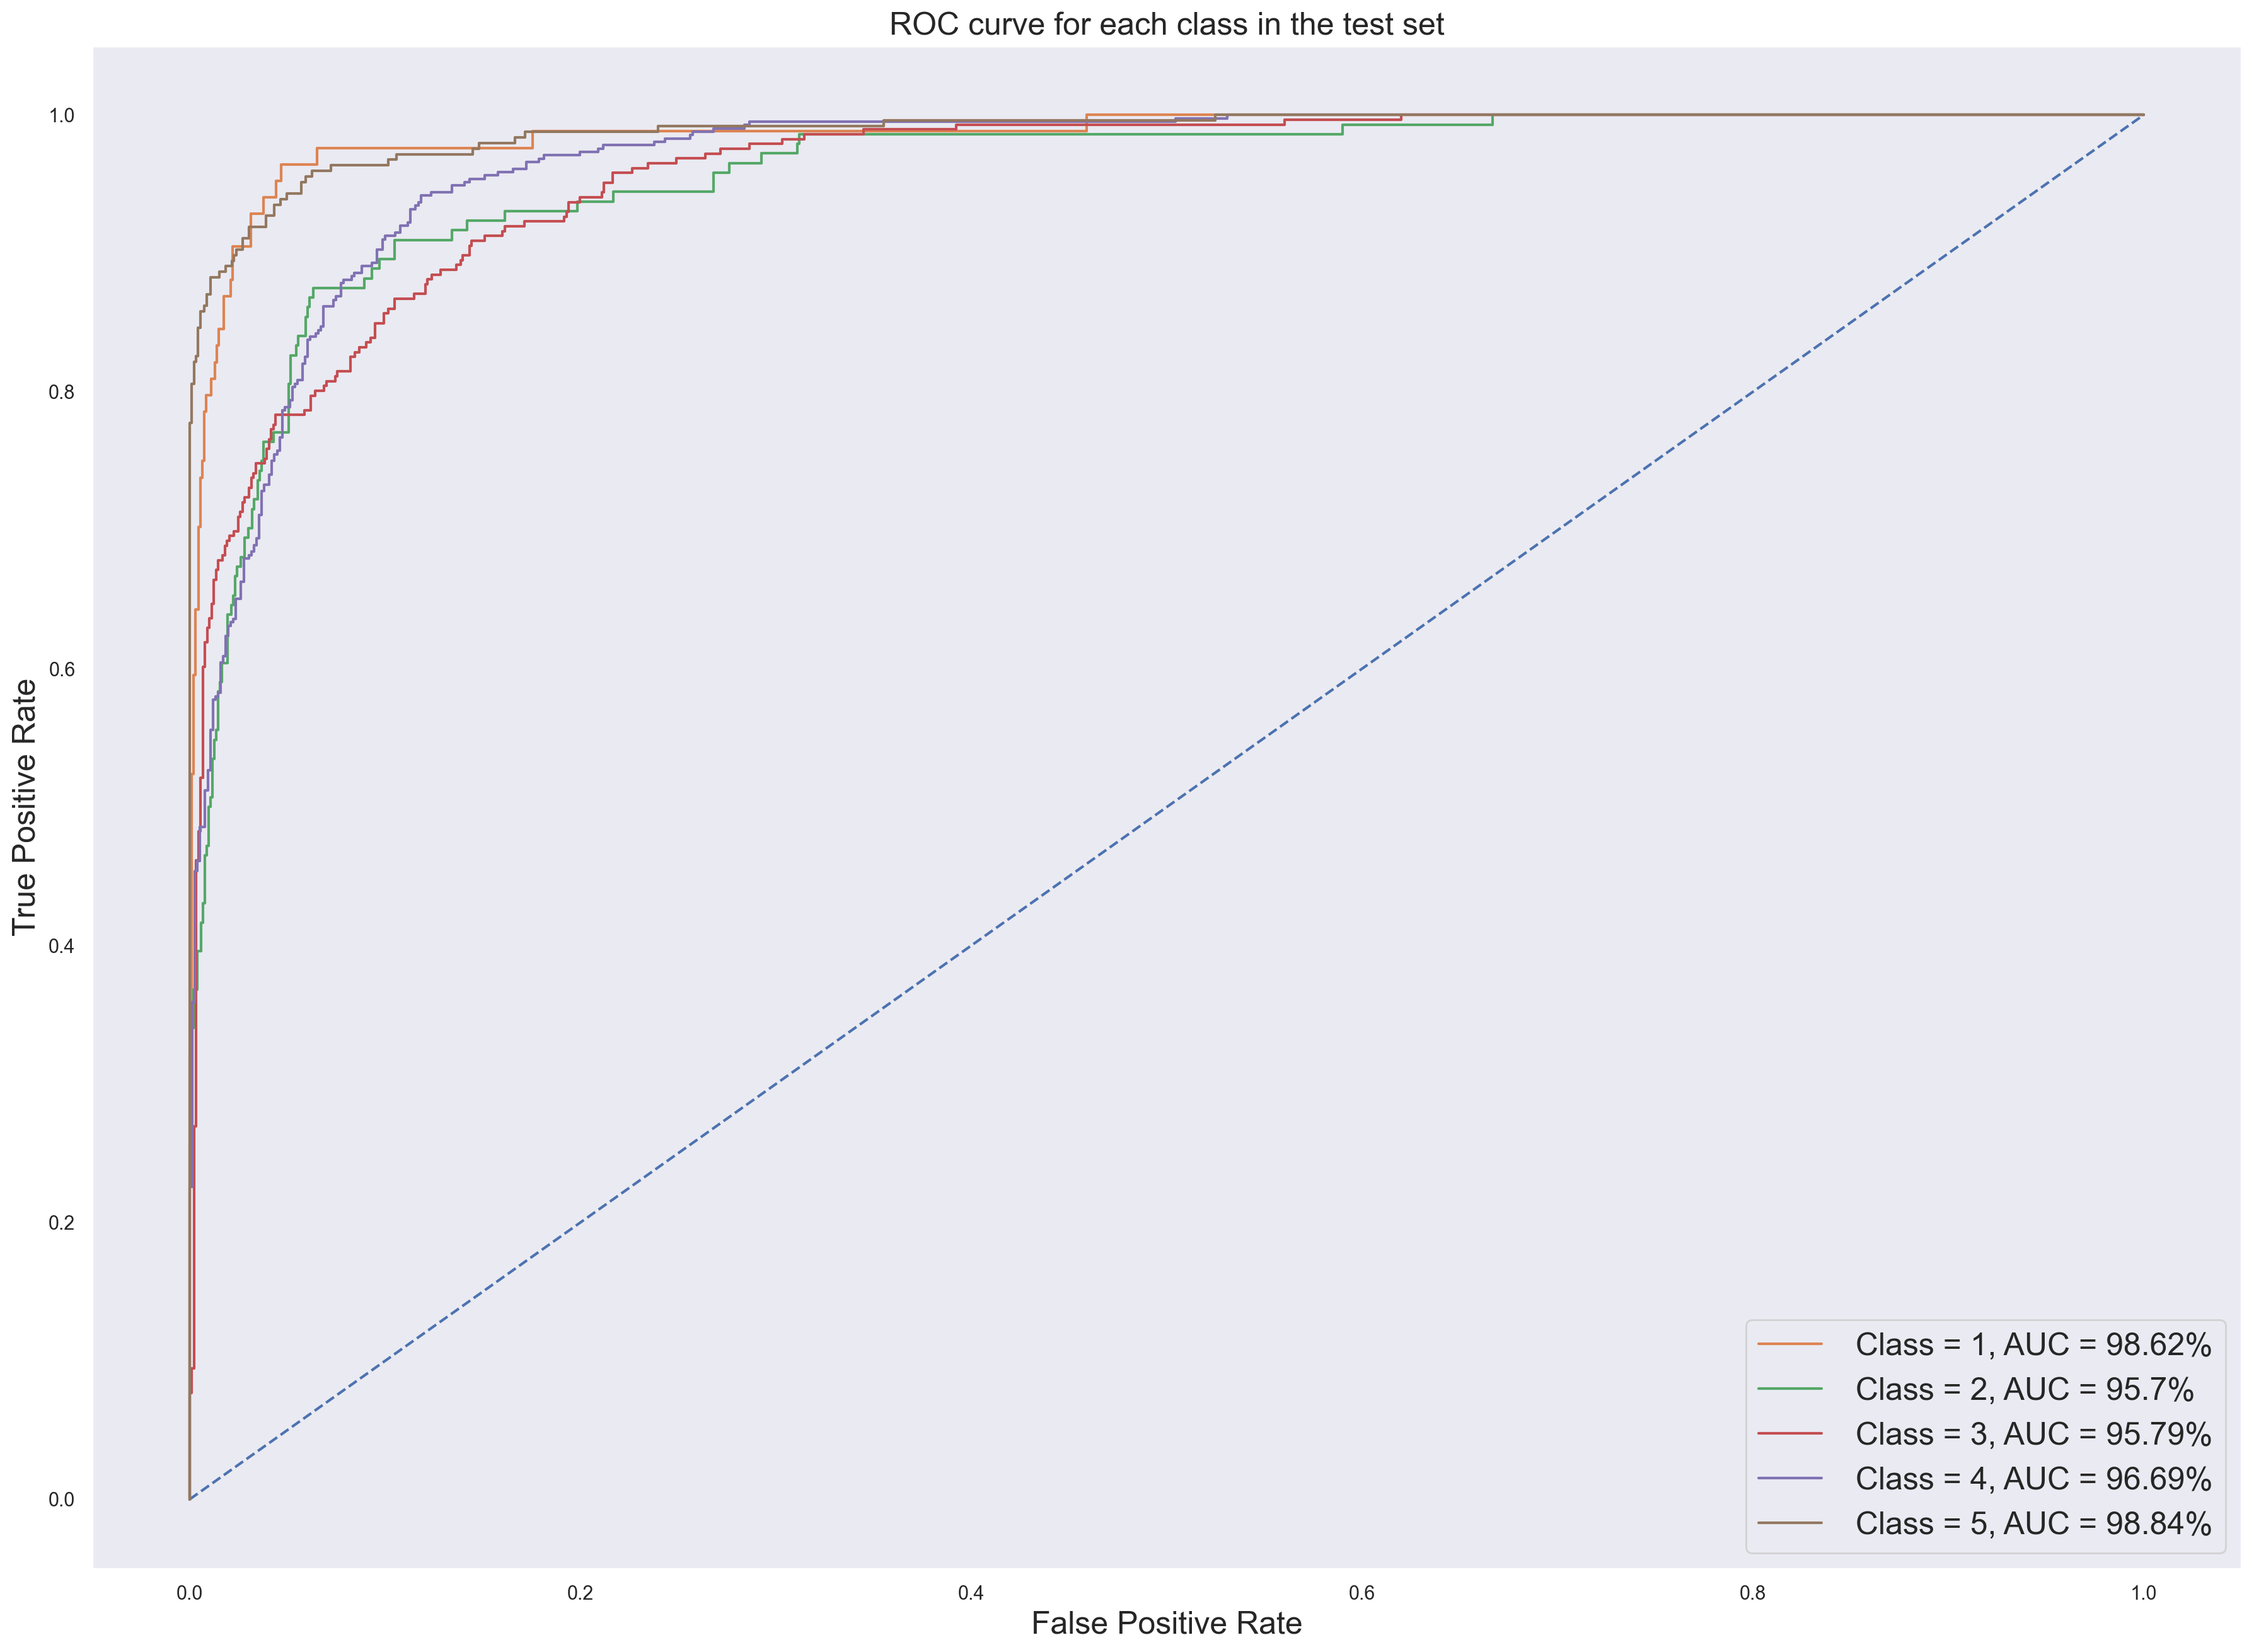

In [137]:
# plot no skill
plt.figure(figsize=(22,16), dpi=200)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
for l in y_test.sort_values('rating').rating.unique():
    # keep probabilities for the positive outcome only
    probs = estimator11.predict_proba(X_test[best_features11])[:, l-1]
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, probs,pos_label=l)
    print('Class:',l,'AUC:',auc(fpr, tpr))
    plt.plot(fpr, tpr,label=' Class = '+str(l)+', AUC = ' + str(round(auc(fpr, tpr)*100,2))+'%')

plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.title('ROC curve for each class in the test set', fontsize=18)
plt.grid()
# show the plot
plt.show()

Class: 1 AUC: 0.9861165770256679
Class: 2 AUC: 0.9549049778641616
Class: 3 AUC: 0.9600444651177458
Class: 4 AUC: 0.9677800033170458
Class: 5 AUC: 0.9885494180708458


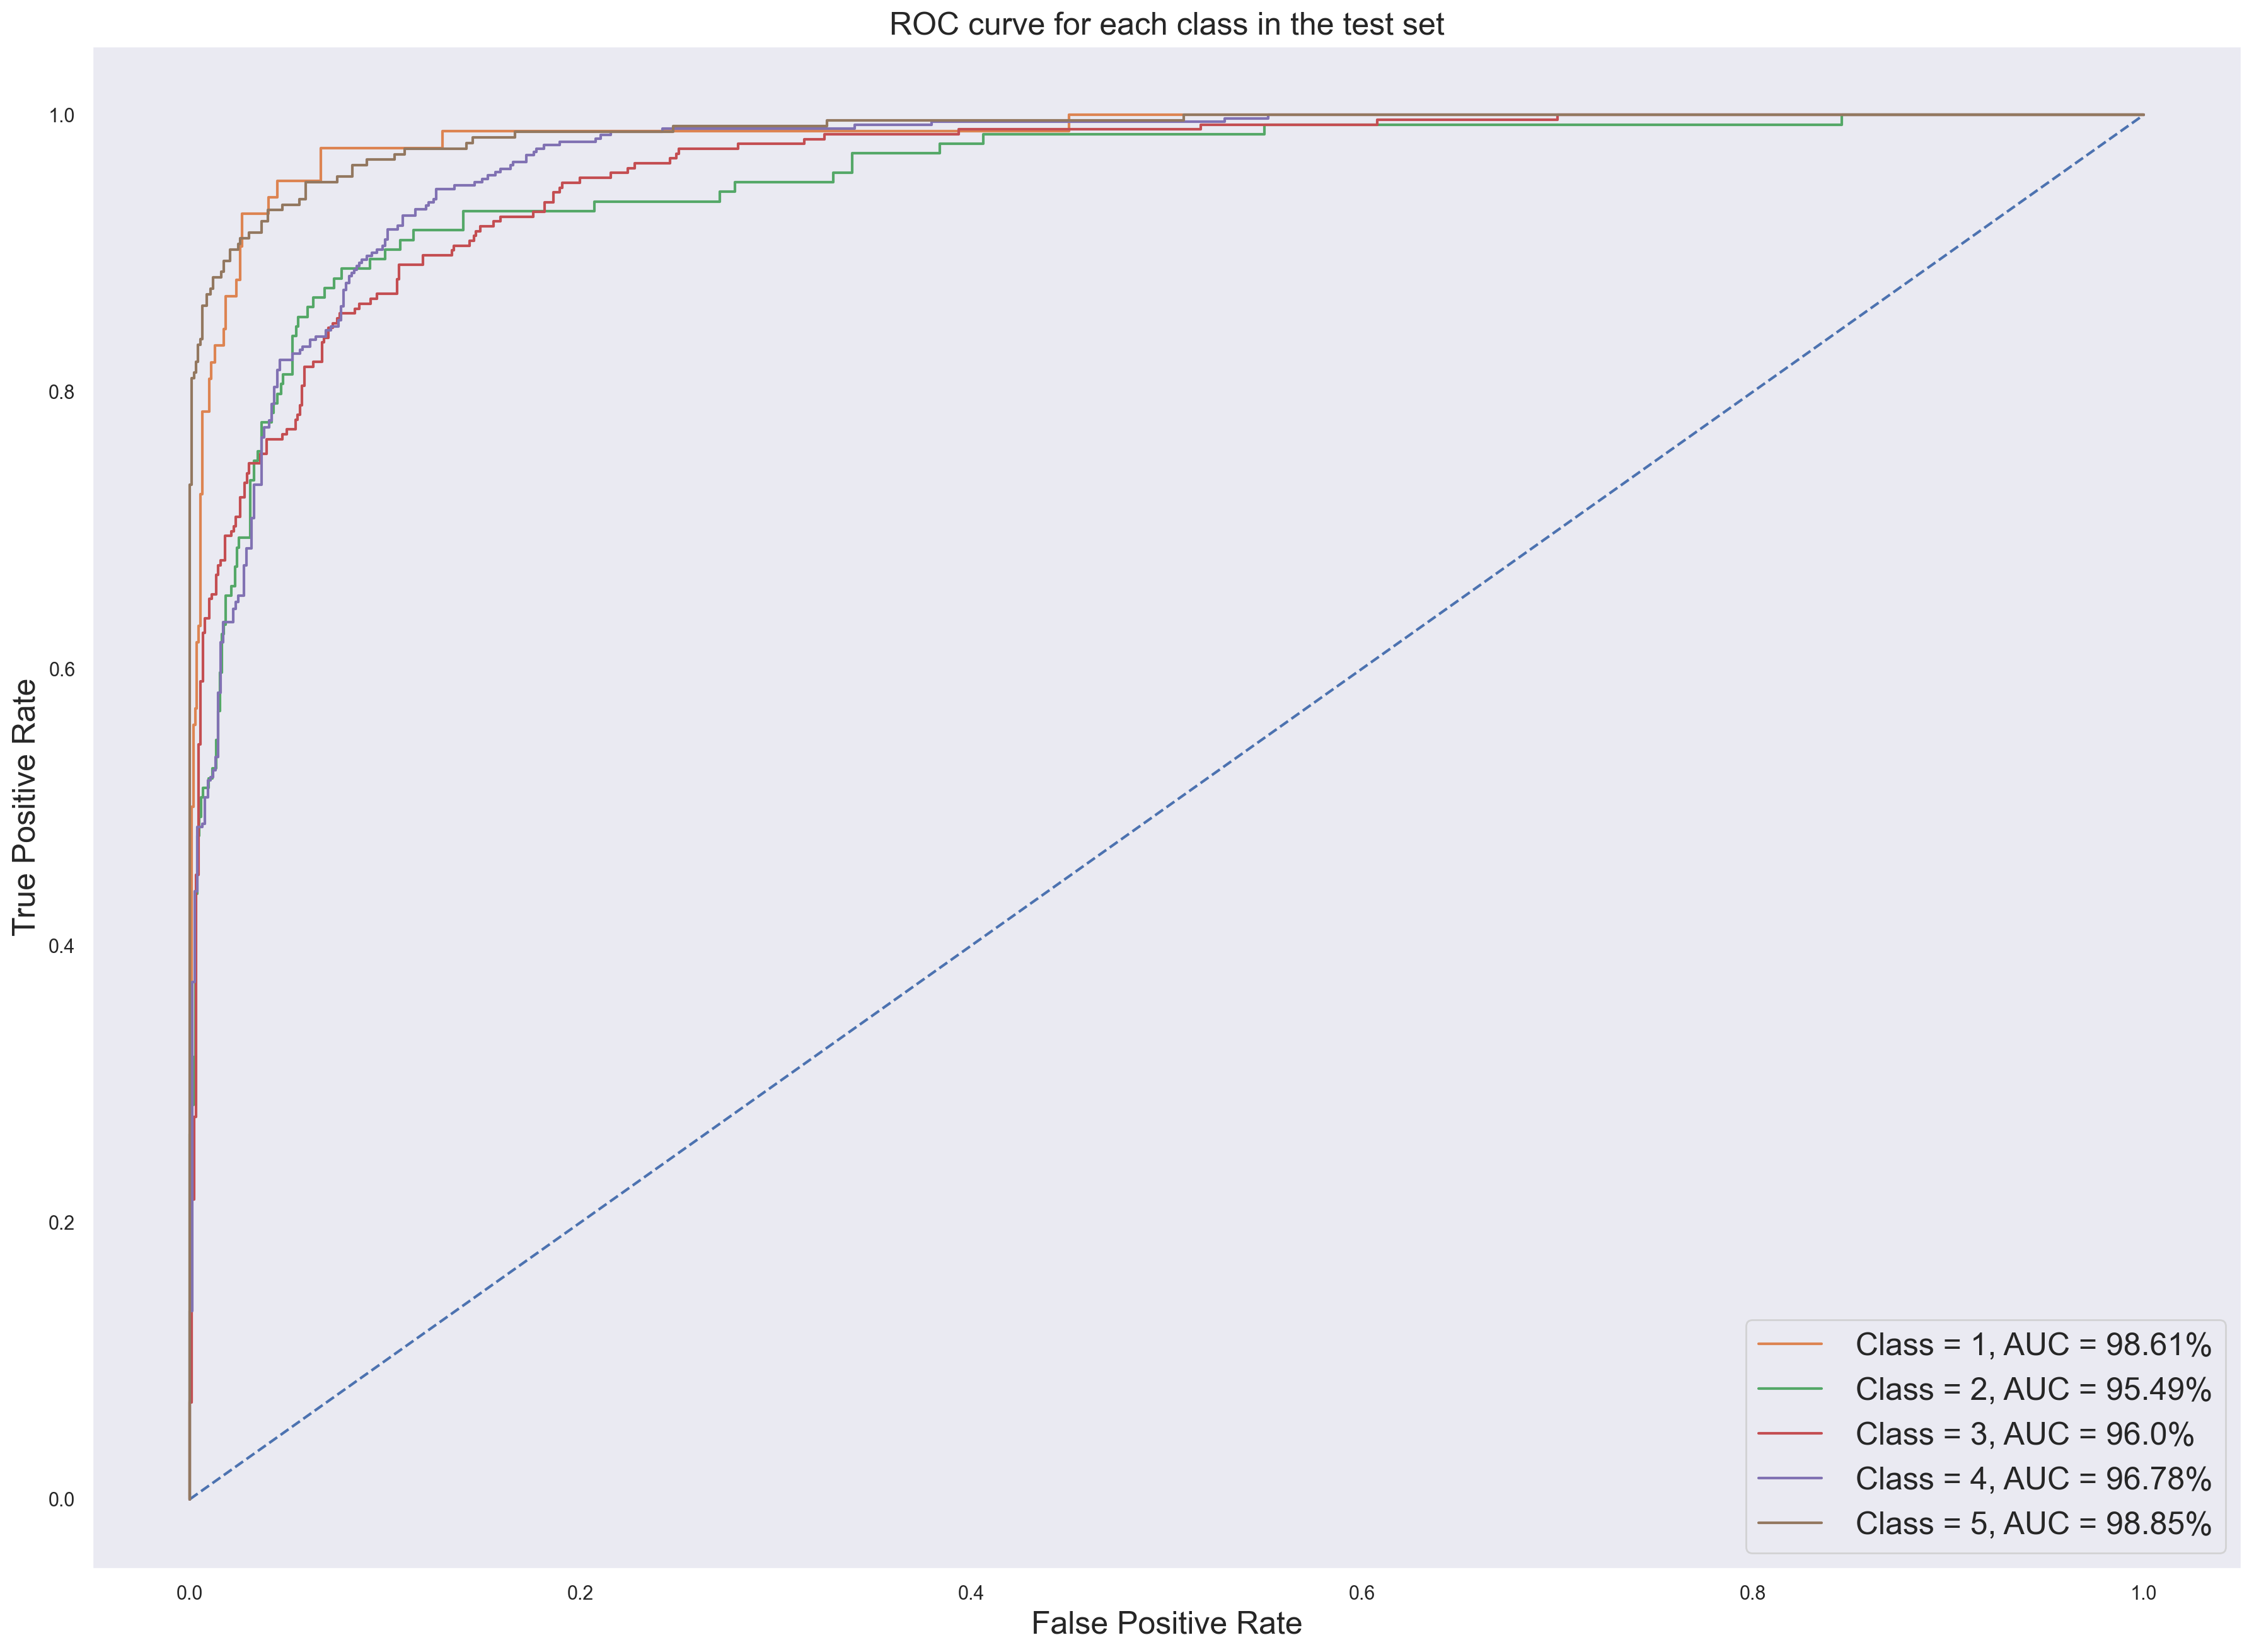

In [125]:
# plot no skill
plt.figure(figsize=(22,16), dpi=200)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
for l in y_test.sort_values('rating').rating.unique():
    # keep probabilities for the positive outcome only
    probs = estimator.predict_proba(X_test[best_features])[:, l-1]
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, probs,pos_label=l)
    print('Class:',l,'AUC:',auc(fpr, tpr))
    plt.plot(fpr, tpr,label=' Class = '+str(l)+', AUC = ' + str(round(auc(fpr, tpr)*100,2))+'%')

plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.title('ROC curve for each class in the test set', fontsize=18)
plt.grid()
# show the plot
plt.show()

In [23]:
features_importance = pd.DataFrame({'col_name':feature_names,'importance': ensemble_model.feature_importances_})
features_importance.sort_values('importance', ascending=[False])
important_features = features_importance#[features_importance['importance']>0.0]
important_features = important_features.sort_values('importance', ascending=[True])
important_features = important_features[(important_features.col_name != 'User Popularity Decay')&(important_features.col_name != 'Average Speed')]

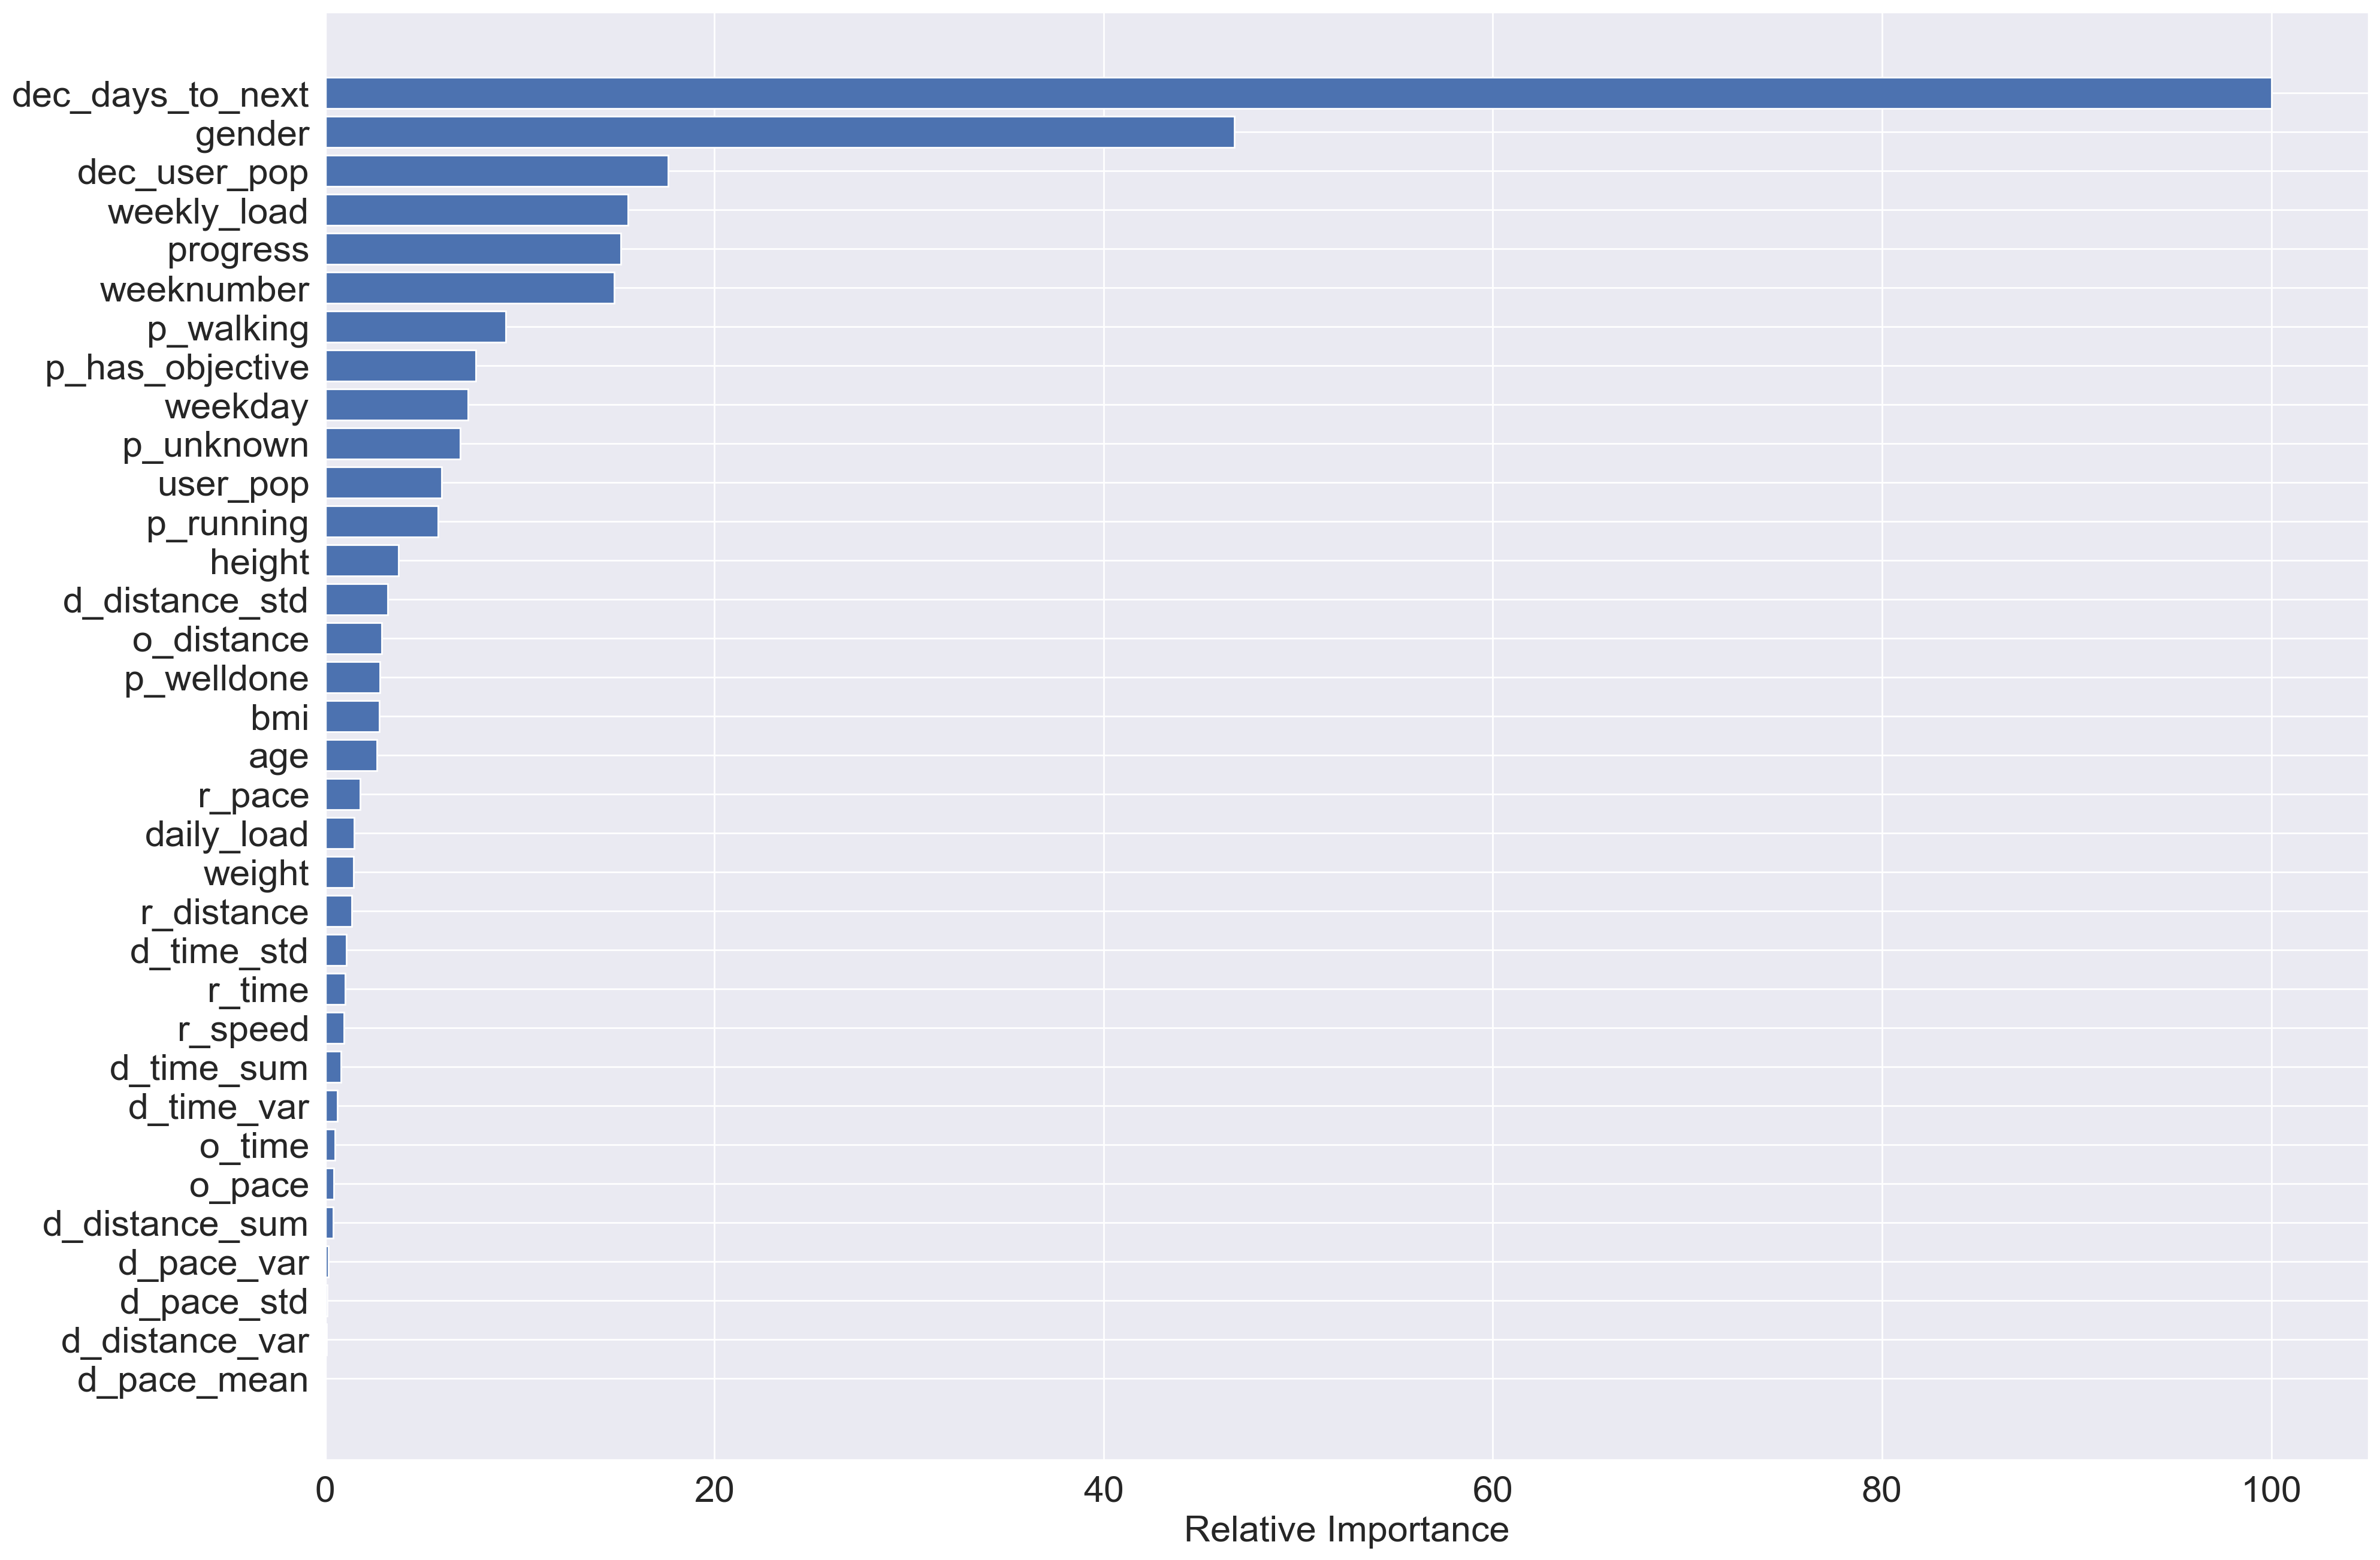

In [24]:
import seaborn as sns
features = important_features['col_name']
importances = important_features['importance']
sorted_idx = importances.index
importances = 100.0 * (importances / importances.max())



pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(22,16), dpi=200)
plt.barh(pos, importances[sorted_idx], align='center')
plt.yticks(pos, features, fontsize=22)
plt.xticks(fontsize=22)
plt.xlabel('Relative Importance', fontsize=22)
plt.title('')
plt.show()

Class: 1 Train AUC: 0.9999978802062135
Class: 1 Test AUC: 0.9810551401460492
Class: 2 Train AUC: 0.9967395586912683
Class: 2 Test AUC: 0.9602634704675521
Class: 3 Train AUC: 0.9974178652157313
Class: 3 Test AUC: 0.950252678550311
Class: 4 Train AUC: 0.9978229687286186
Class: 4 Test AUC: 0.9673781304619624
Class: 5 Train AUC: 0.9991700338816086
Class: 5 Test AUC: 0.9856594468393945


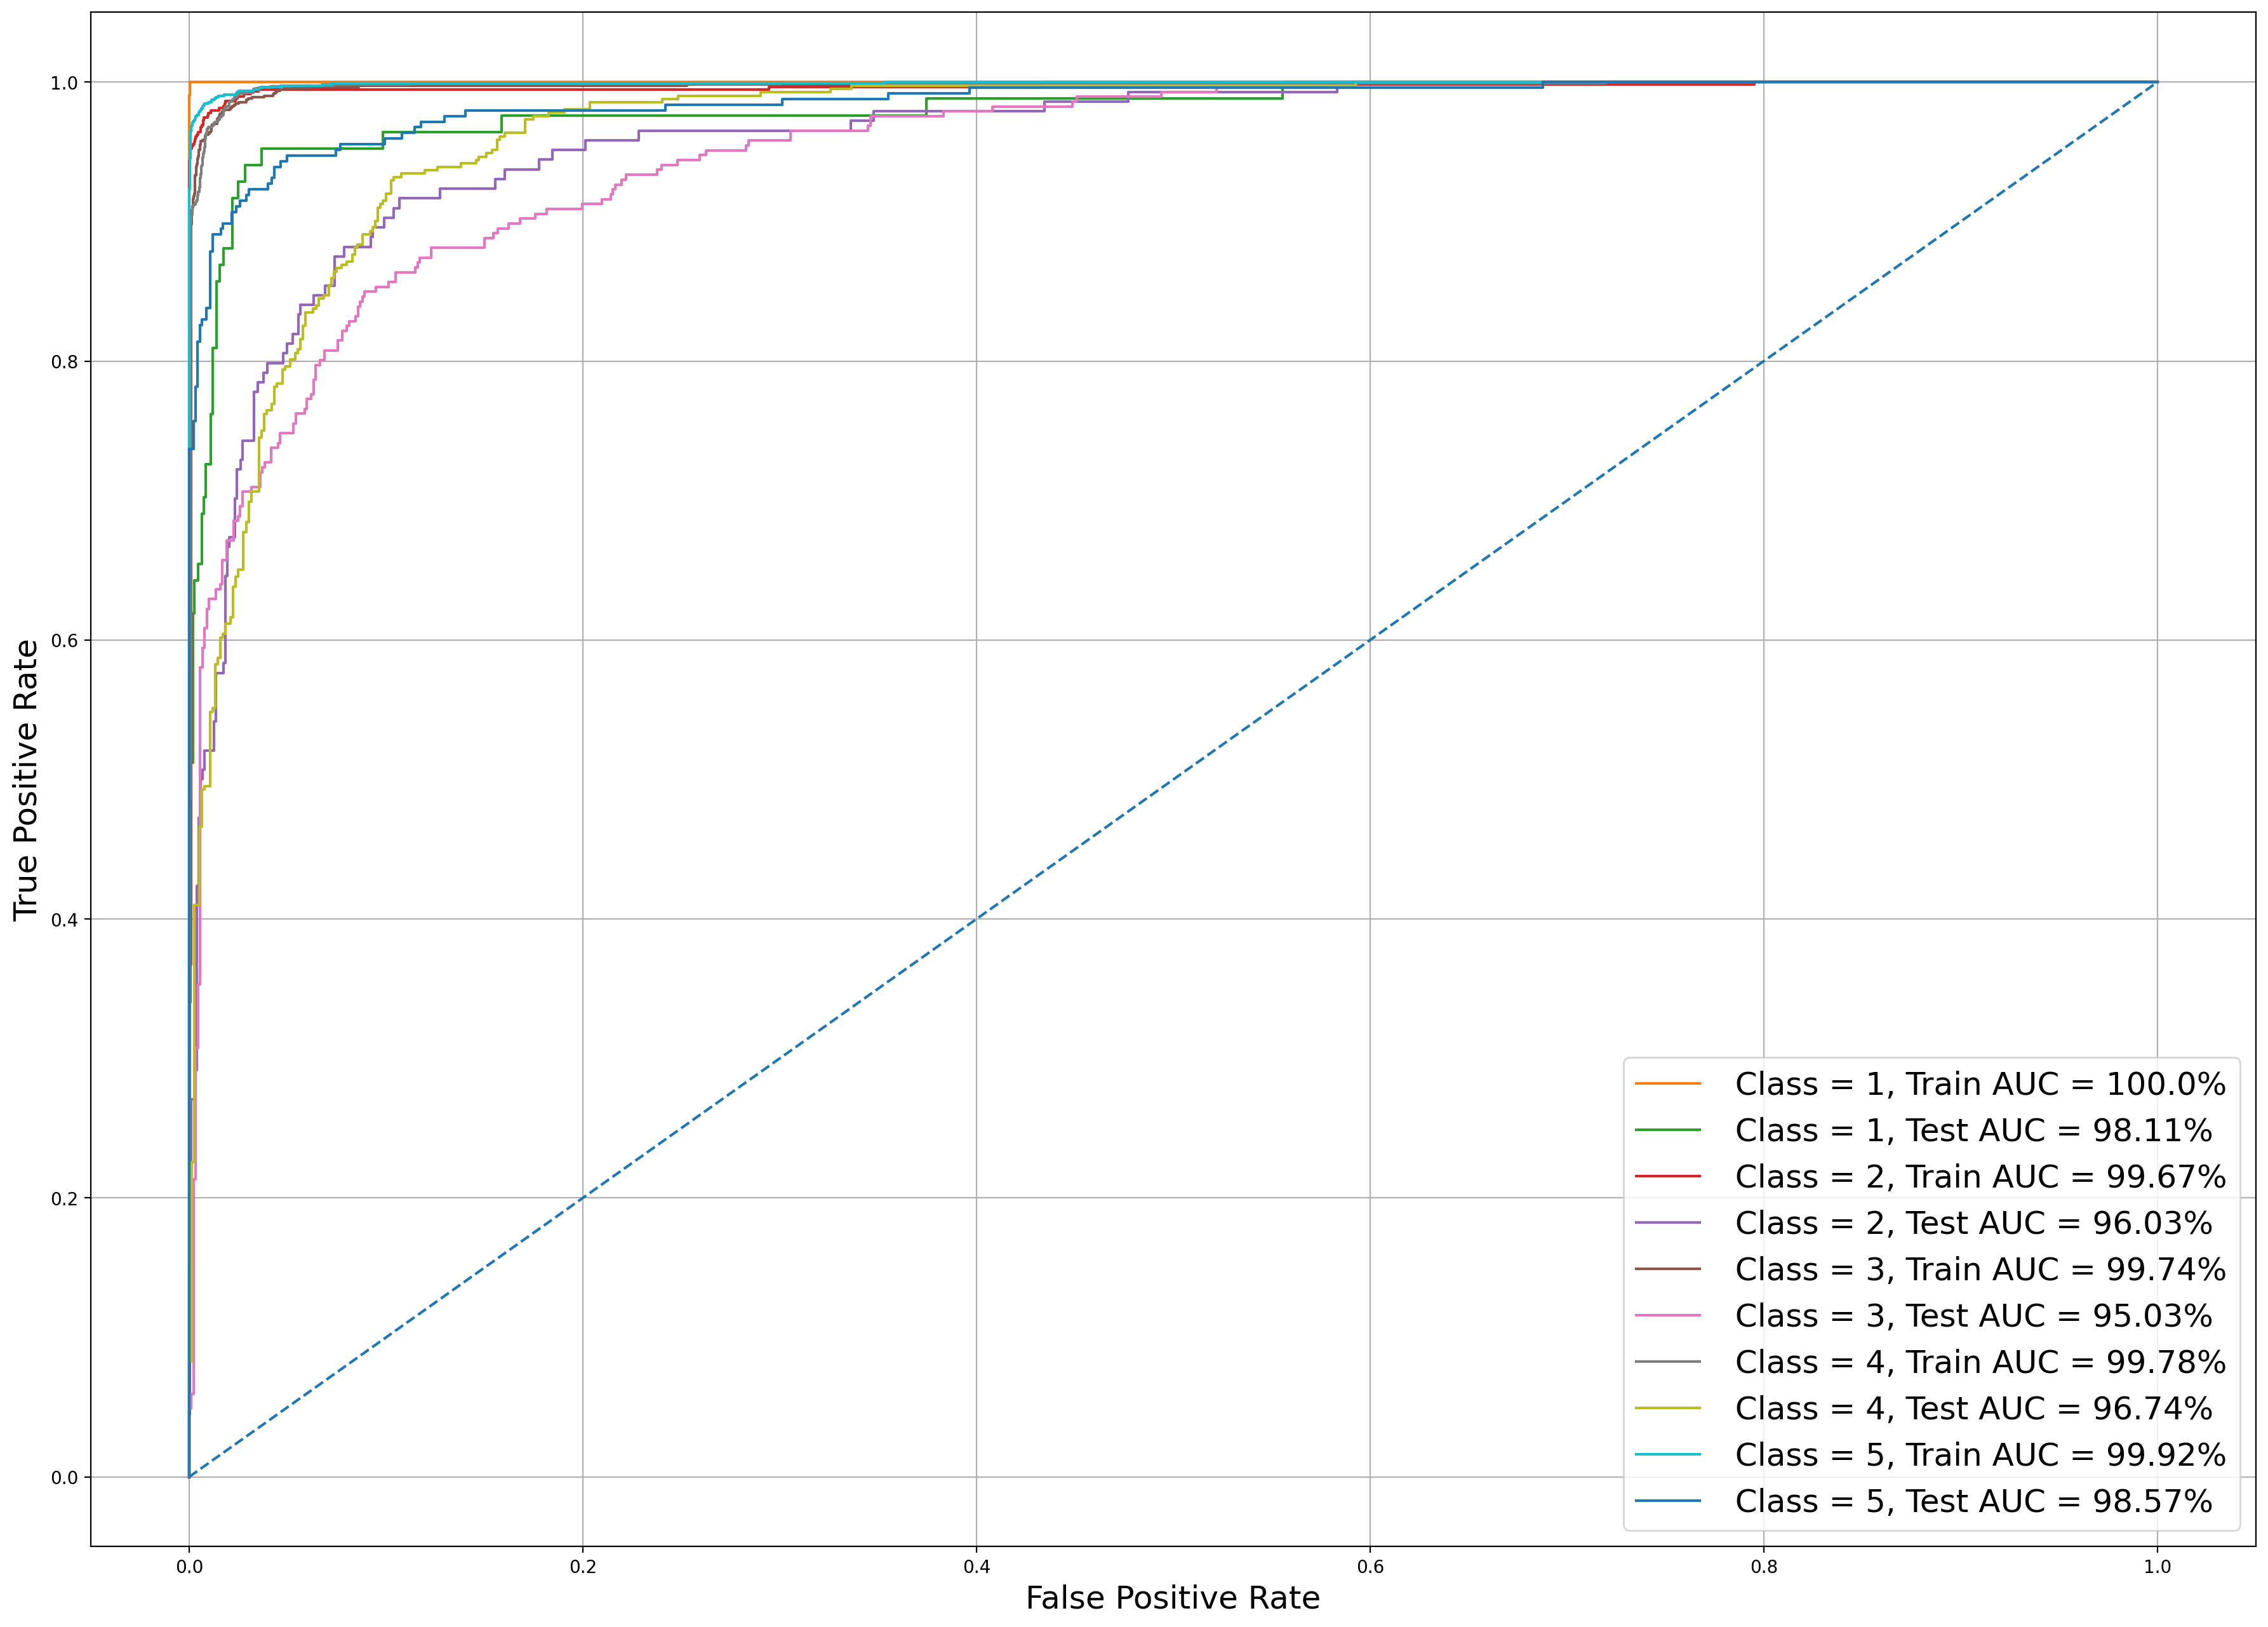

In [27]:
# plot no skill
plt.figure(figsize=(22,16), dpi=200)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
for l in y_test.sort_values('rating').rating.unique():
    # keep probabilities for the positive outcome only
    probs = trained_model.predict_proba(X_train[fc])[:, l-1]
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_train, probs,pos_label=l)
    print('Class:',l,'Train AUC:',auc(fpr, tpr))
    plt.plot(fpr, tpr,label=' Class = '+str(l)+', Train AUC = ' + str(round(auc(fpr, tpr)*100,2))+'%')
    
    # keep probabilities for the positive outcome only
    probs = trained_model.predict_proba(X_test[fc])[:, l-1]
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, probs,pos_label=l)
    print('Class:',l,'Test AUC:',auc(fpr, tpr))
    plt.plot(fpr, tpr,label=' Class = '+str(l)+', Test AUC = ' + str(round(auc(fpr, tpr)*100,2))+'%')

plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.grid()
# show the plot
plt.show()

In [113]:
fc_values = {'o_distance':'Distance Objective',
 'p_unknown': 'Percentage of Free Actvities',
 'p_walking':'Percentage of Walking Actvities',
 'p_running':'Percentage of Running Actvities',
 'r_time': 'Workout Duration',
 'r_speed': 'Average S',
 'r_distance':'Covered Distance',
 'r_pace': 'Average Pace',
 'o_pace':'Pace Objective',
 'o_time':'Time Objective',
 'p_welldone':'Percentage of Well Done Actvities',
 'weight_situation': 'User Weight Condition',
 'age':'Age',
 'height':'Height',
 'weight':'Weight',
 'gender':'Gender',
 'bmi':'BMI',
 'calories':'Burnt Calories',
 'p_has_objective':'Percentage of Actvities with Objective',
 'd_pace_std': 'Pace Gap Standard Deviation',
 'd_pace_mean': 'Pace Gap Mean',
 'd_time_sum':'Time Gap',
 'd_distance_var': 'Distance Gap Variance',
 'd_time_var':'Time Gap Variance',
 'd_distance_std': 'Distance Gap Standard Deviation',
 'd_time_std':'Time Gap Standard Deviation',
 'd_distance_sum': 'Distance Gap',
 'd_pace_var': 'Pace Gap Variance',
 'mean_rating':'Mean Rating'
            }
features = [fc_values[x] for x in columns]

In [114]:
features = [fc_values[x] for x in columns]

In [121]:
len(model.feature_importances_)

27

In [108]:
len(columns)

29

In [115]:
#features = X_train[fc].columns.values
features_importance = pd.DataFrame({'feature':features,'col_name':columns,'importance': trained_model.feature_importances_})
features_importance.sort_values('importance', ascending=[False])
important_features = features_importance[features_importance['col_name']!='r_speed']
important_features = important_features.sort_values('importance', ascending=[True])
important_features

,feature,col_name,importance
11,User Weight Condition,weight_situation,0.000715
15,Gender,gender,0.003367
18,Percentage of Actvities with Objective,p_has_objective,0.004171
3,Percentage of Running Actvities,p_running,0.005331
1,Percentage of Free Actvities,p_unknown,0.005412
13,Height,height,0.006340
14,Weight,weight,0.006849
12,Age,age,0.007144
16,BMI,bmi,0.007475
10,Percentage of Well Done Actvities,p_welldone,0.007544


In [116]:
features = important_features['feature']
importances = important_features['importance']

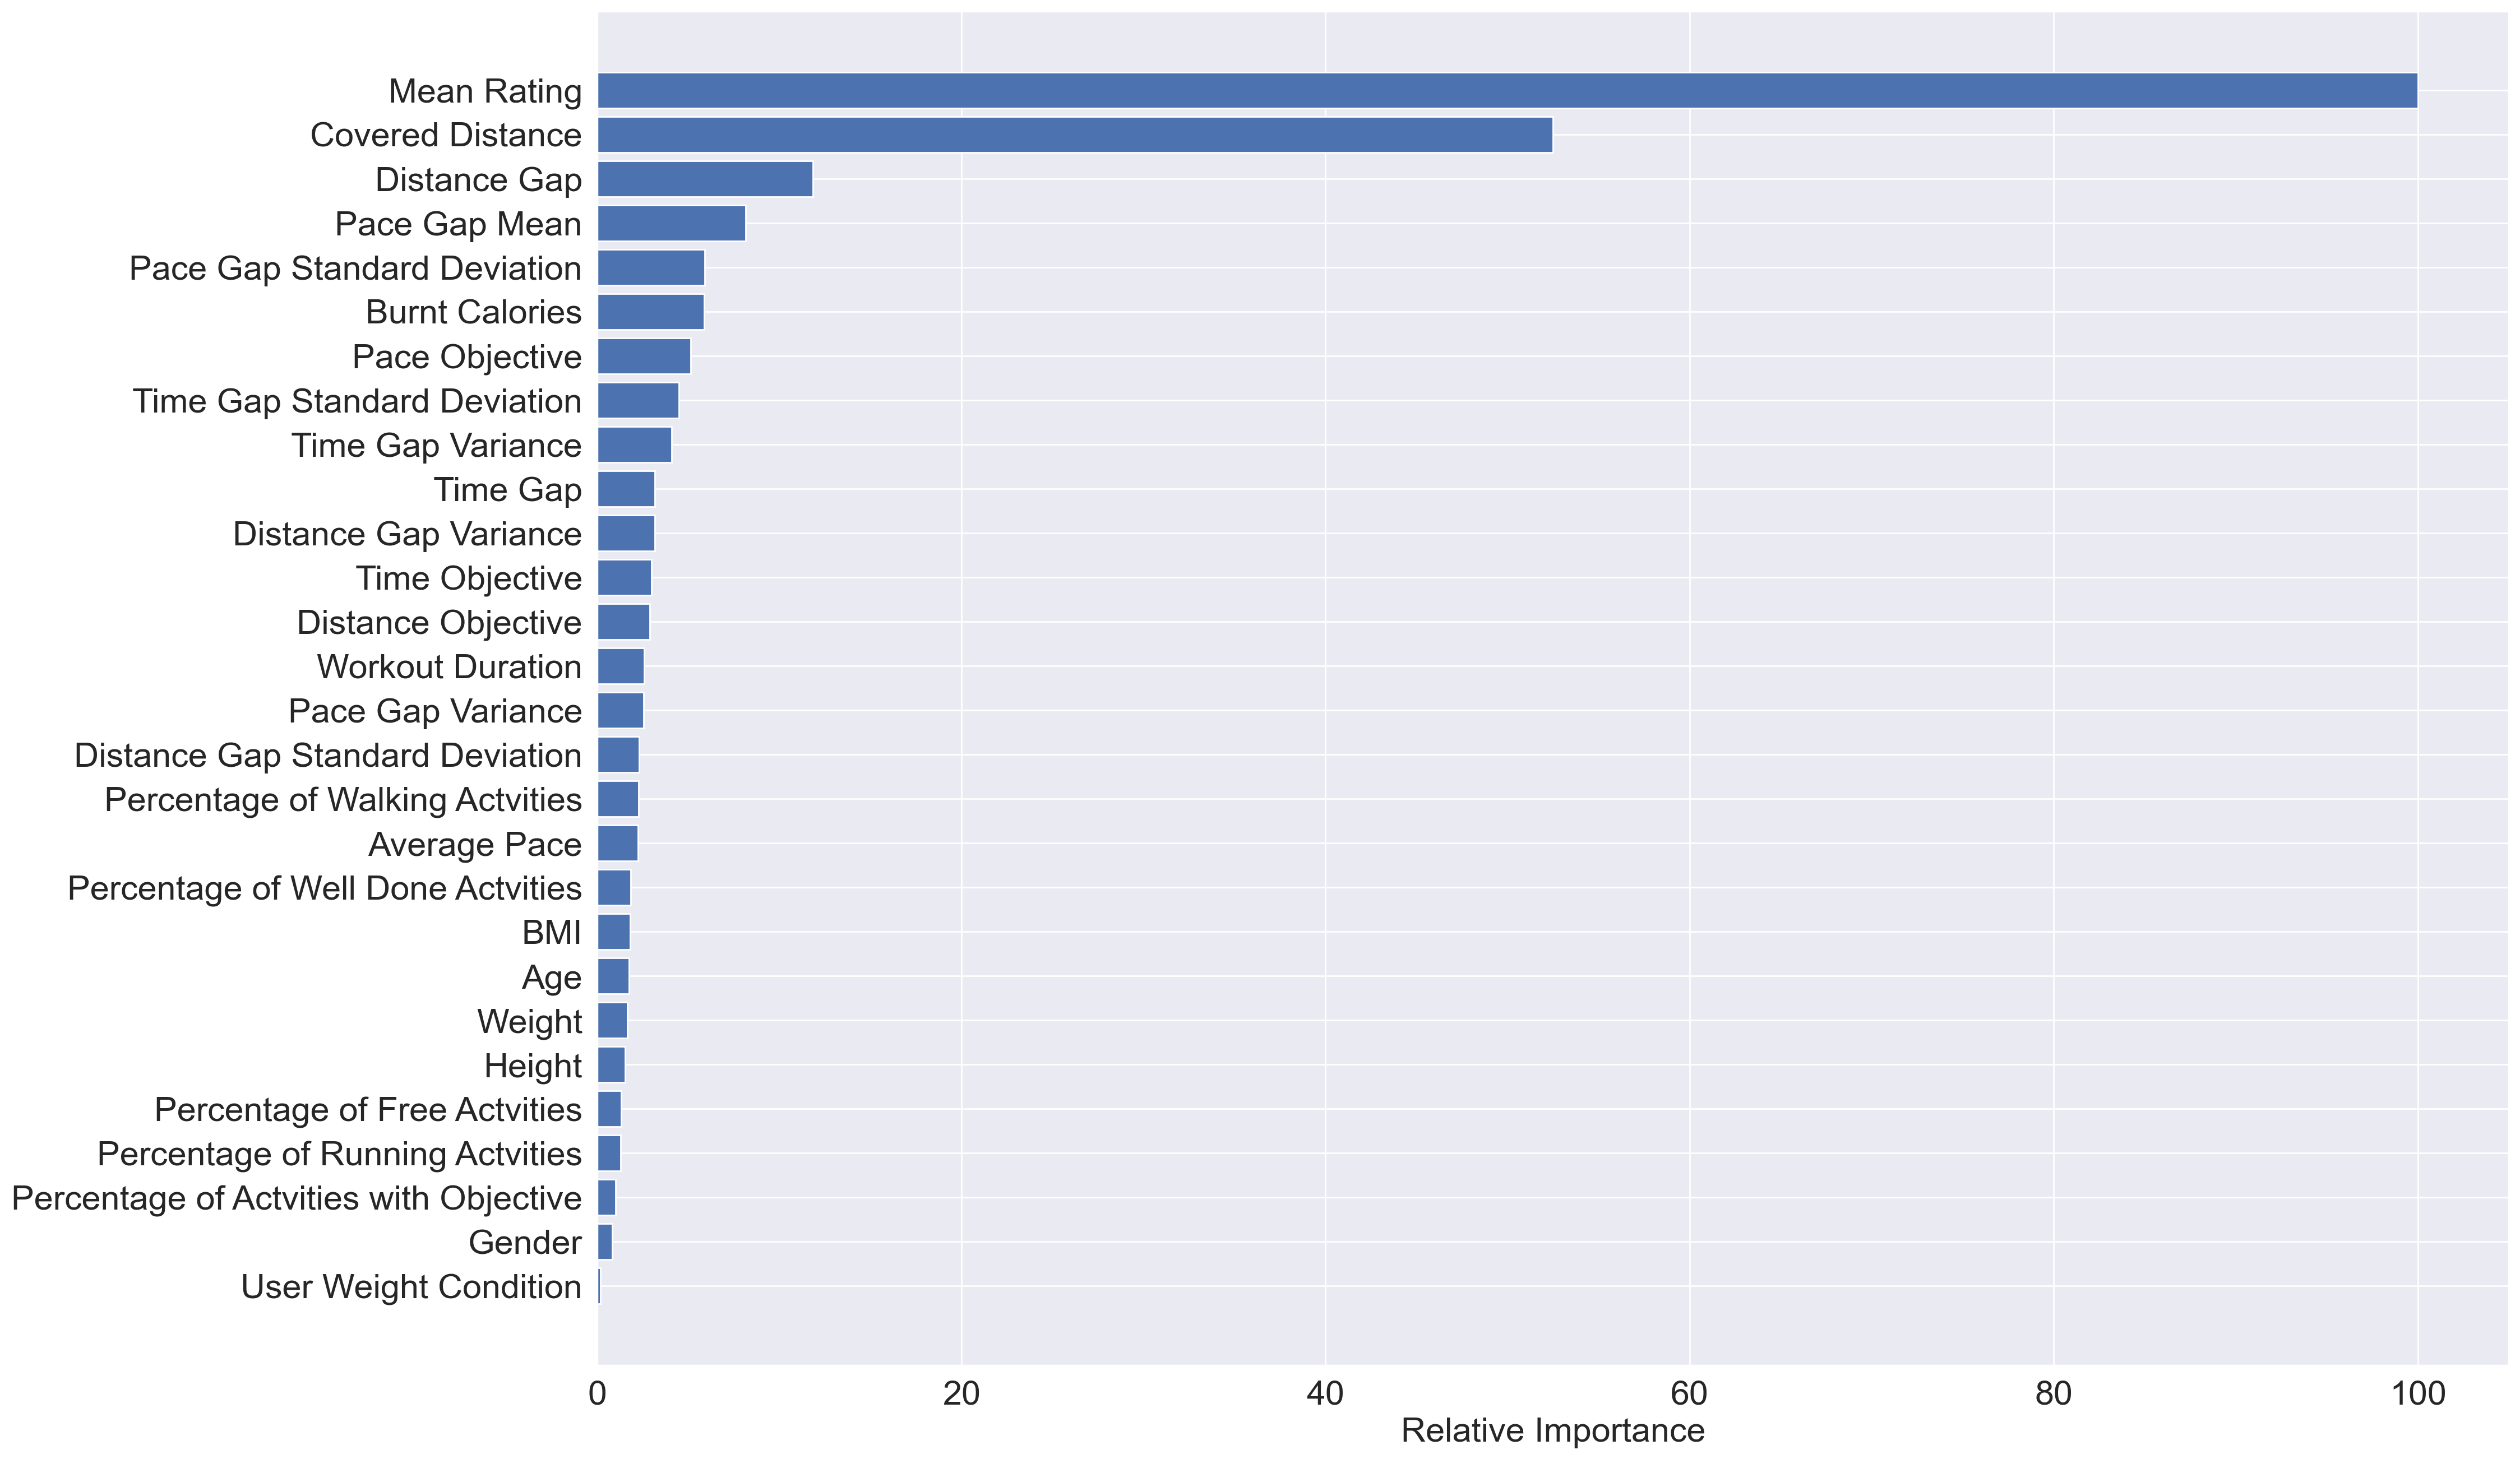

In [117]:
sorted_idx = importances.index
importances = 100.0 * (importances / importances.max())



pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(22,16), dpi=200)
plt.barh(pos, importances[sorted_idx], align='center')
plt.yticks(pos, features, fontsize=22)
plt.xticks(fontsize=22)
plt.xlabel('Relative Importance', fontsize=22)
plt.title('')
plt.show()

In [152]:
test_set = X_test
test_set['rating'] = y_test.values

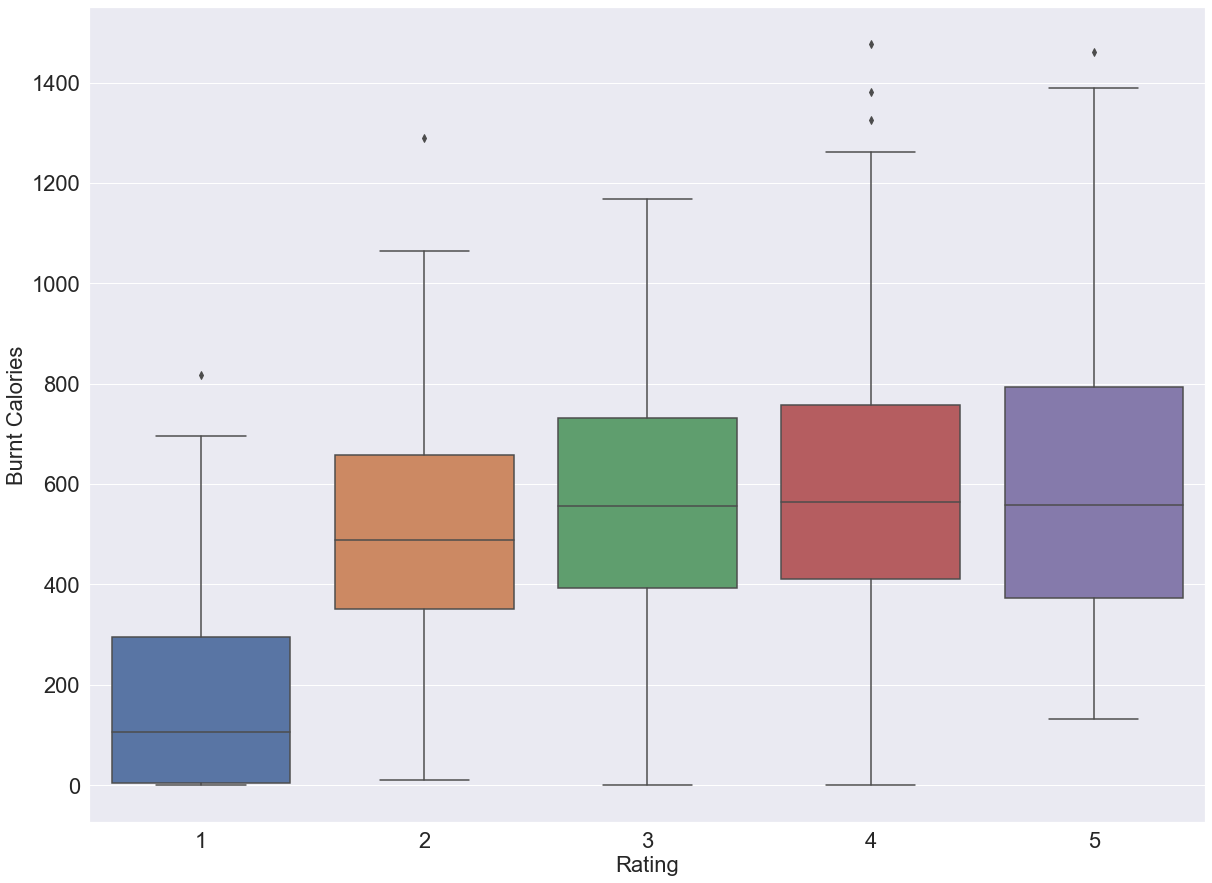

In [209]:
plt.figure(figsize=(20,15))
ax= sns.boxplot(x='rating',y='calories',data=test_set[test_set.calories<1500])
ax.set(xlabel='Rating', ylabel='Burnt Calories')
plt.xlabel('Rating', fontsize=22)
plt.ylabel('Burnt Calories', fontsize=22)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.show()

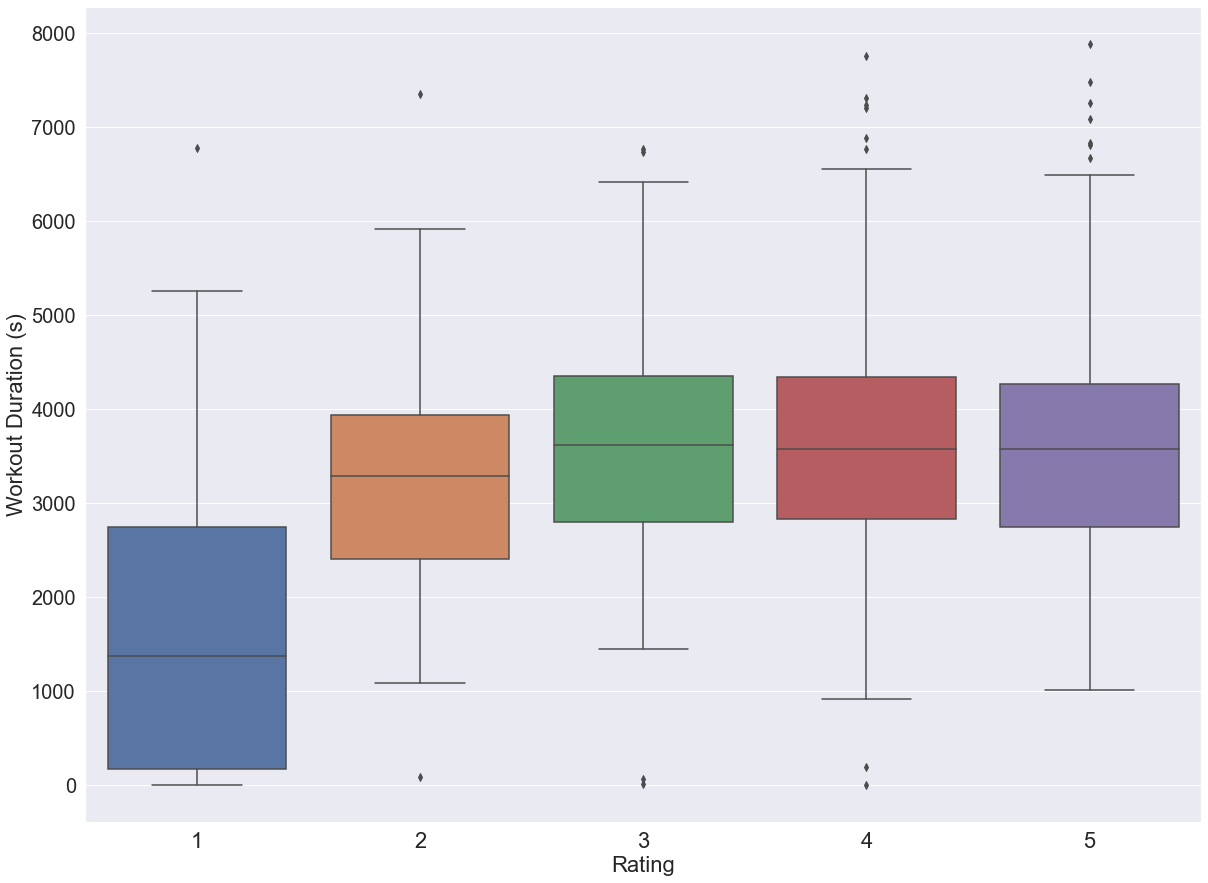

In [211]:
plt.figure(figsize=(20,15))
ax = sns.boxplot(x='rating',y='r_time',data=test_set[test_set.r_time<8000])
plt.xlabel('Rating', fontsize=22)
plt.ylabel('Workout Duration (s)', fontsize=22)
plt.yticks(fontsize=20)
plt.xticks(fontsize=22)
plt.show()